# Load Data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd

adviser_advisee = pd.read_csv('gdrive/My Drive/AdvisorAdviseeData.csv')

adviser_advisee = adviser_advisee[adviser_advisee.isna().sum(axis=1) <= 15]
adviser_advisee = adviser_advisee[adviser_advisee['University'] != 'University of California, Berkeley']

print(len(adviser_advisee))
adviser_advisee.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2842


,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Website,Advisee Name,Advisee Degree,Advisee Nationality,Advisee Gender,Start Year,End Year,Advisee Previous School,Advisee Citation,Advisee h-index,Advisee Linkedin or Website
0,MIT,1.0,1.0,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,USA,M,1715,16.0,37.0,2006.0,http://www.mit.edu/~gbresler/,Enric Boix-Adserà,PHD,Spain,M,NaN,present,Princeton,37,4.0,http://web.mit.edu/~eboix/www/
1,MIT,1.0,1.0,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,USA,M,1715,16.0,37.0,2006.0,http://www.mit.edu/~gbresler/,Matthew Brennan,PHD,USA,M,NaN,present,MIT,123,7.0,http://www.mit.edu/~brennanm/
2,MIT,1.0,1.0,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,USA,M,1715,16.0,37.0,2006.0,http://www.mit.edu/~gbresler/,Chenghao Guo,PHD,China,M,NaN,present,NaN,NaN,NaN,https://www.linkedin.com/in/chenghao-guo-79327...
3,MIT,1.0,1.0,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,USA,M,1715,16.0,37.0,2006.0,http://www.mit.edu/~gbresler/,Brice Huang,PHD,USA,M,2020.0,present,MIT,NaN,NaN,https://www.linkedin.com/in/bricehuang/
4,MIT,1.0,1.0,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,USA,M,1715,16.0,37.0,2006.0,http://www.mit.edu/~gbresler/,Dheeraj Nagaraj,PHD,India,M,NaN,present,IIT Madras,70,5.0,https://www.linkedin.com/in/dheeraj-m-nagaraj-...


In [ ]:
print((adviser_advisee['Start Year'].isna() & adviser_advisee['End Year'].isna()).sum())
print(adviser_advisee['Advisee Degree'].isna().sum())
print(adviser_advisee['Advisee Nationality'].isna().sum())
print(adviser_advisee['Advisee Gender'].isna().sum())
print((adviser_advisee['Advisee Nationality'].isna() | adviser_advisee['Advisee Gender'].isna()).sum())

237
47
223
22
235


# Data Cleaning

In [ ]:
import re
adviser_advisee.dropna(subset=['Advisee Nationality', 'Advisee Gender'], inplace=True)
# adviser_advisee['Advisee Nationality'].fillna("Unknown", inplace=True)
adviser_advisee['Advisee Nationality'] = adviser_advisee['Advisee Nationality'].str.replace('\t', '')
adviser_advisee['Advisee Nationality'] = adviser_advisee['Advisee Nationality'].str.lower()
adviser_advisee['Advisee Nationality'] = adviser_advisee['Advisee Nationality'].str.capitalize()

adviser_advisee['Advisor Nationality'] = adviser_advisee['Advisor Nationality'].str.replace('\t', '')
adviser_advisee['Advisor Nationality'] = adviser_advisee['Advisor Nationality'].str.lower()
adviser_advisee['Advisor Nationality'] = adviser_advisee['Advisor Nationality'].str.capitalize()

adviser_advisee['Advisor Citation'] = adviser_advisee['Advisor Citation'].str.replace(',', '')
adviser_advisee['Advisor Citation'] = adviser_advisee['Advisor Citation'].astype(float).astype('Int64')

adviser_advisee['Advisor h-index'] = adviser_advisee['Advisor h-index'].astype(float).astype('Int64')

adviser_advisee['Advisor First Paper Year'] = adviser_advisee['Advisor First Paper Year'].astype(float).astype('Int64')
adviser_advisee['Advisor Publication Number'] = adviser_advisee['Advisor Publication Number'].astype(float).astype('Int64')


advier_advisee_nonan_gender = adviser_advisee.dropna(subset=['Advisee Gender'])
advier_advisee_nonan_nationality = adviser_advisee.dropna(subset=['Advisee Nationality'])

adviser_advisee['Advisee Citation'] = adviser_advisee['Advisee Citation'].str.replace(',', '')
adviser_advisee['Advisee Citation'] = adviser_advisee['Advisee Citation'].astype(float).astype('Int64')
adviser_advisee['Advisee h-index'] = adviser_advisee['Advisee h-index'].astype(float).astype('Int64')
adviser_advisee['World Field Ranking'] = adviser_advisee['World Field Ranking'].astype(float).astype('Int64')
adviser_advisee['North US Field Ranking'] = adviser_advisee['North US Field Ranking'].astype(float).astype('Int64')



adviser_advisee.dropna()

,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Website,Advisee Name,Advisee Degree,Advisee Nationality,Advisee Gender,Start Year,End Year,Advisee Previous School,Advisee Citation,Advisee h-index,Advisee Linkedin or Website
6,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,http://www.mit.edu/~gbresler/,Mina Karzand,PHD,Iran,F,2009.0,present,EPFL,101,3,https://www.linkedin.com/in/mina-karzand-10a63...
7,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,http://www.mit.edu/~gbresler/,Nir Weinberger,PostDoc,Israel,M,2018.0,present,Technion - Israel Institute of Technology,113,6,https://sites.google.com/view/nir-weinberger/home
8,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,http://www.mit.edu/~gbresler/,Rares-Darius Buhai,MS,Romania,M,2019.0,2020,MIT,52,2,https://www.linkedin.com/in/raresbuhai/
9,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,http://nms.csail.mit.edu/~hari/,Prateesh Goyal,PHD,India,M,2016.0,present,"Indian Institute of Technology, Bombay",255,7,https://www.linkedin.com/in/prateesh-goyal-563...
11,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,http://nms.csail.mit.edu/~hari/,frank cangialosi,PHD,Usa,M,2017.0,present,University of Maryland,202,7,https://www.linkedin.com/in/frank-cangialosi-5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,Carnegie Mellon University,3,3,CS,Professor,Phillip B. Gibbons,"Parallel Computing,Distributed/Sensor System,D...",Databases & Information Management-Parallel & ...,Usa,M,26999,82,183,1987,http://www.cs.cmu.edu/~gibbons/,Nandita Vijaykumar,PHD,India,F,2013.0,2019,Carnegie Mellon University,1273,12,http://www.cs.toronto.edu/~nandita/
2841,Carnegie Mellon University,3,3,CS,Professor,Phillip B. Gibbons,"Parallel Computing,Distributed/Sensor System,D...",Databases & Information Management-Parallel & ...,Usa,M,26999,82,183,1987,http://www.cs.cmu.edu/~gibbons/,Kevin Hsieh,PHD,Taiwan,M,2014.0,2019,National Chiao Tung University,1565,15,https://www.linkedin.com/in/kevintwhsieh/
2842,Carnegie Mellon University,3,3,CS,Professor,Phillip B. Gibbons,"Parallel Computing,Distributed/Sensor System,D...",Databases & Information Management-Parallel & ...,Usa,M,26999,82,183,1987,http://www.cs.cmu.edu/~gibbons/,Aaron Harlap,PHD,Usa,M,2014.0,2019,Carnegie Mellon University,691,6,https://aaronharlap.github.io//
2846,Carnegie Mellon University,3,3,CS,Professor,Phillip B. Gibbons,"Parallel Computing,Distributed/Sensor System,D...",Databases & Information Management-Parallel & ...,Usa,M,26999,82,183,1987,http://www.cs.cmu.edu/~gibbons/,Harsha Vardhan Simhadri,PHD,India,M,2007.0,2013,IIT Madras,897,14,https://harsha-simhadri.org/


# Universities Plots

Number of Universities:  6
Stanford University           521
Caltech                       458
Carnegie Mellon University    457
University of Waterloo        438
MIT                           389
Cornell University            344
Name: University, dtype: int64


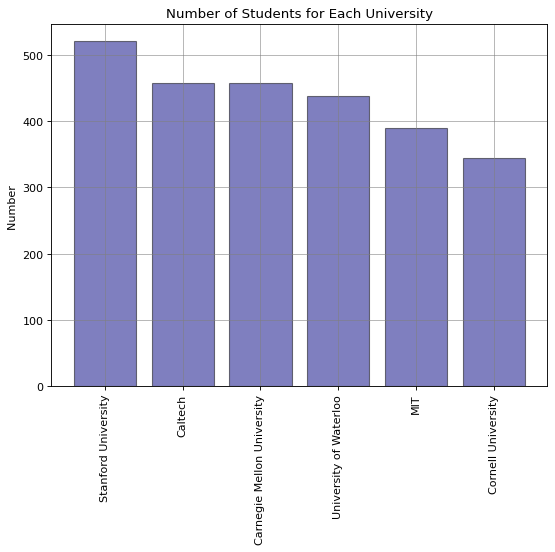

Number of Professors:  120


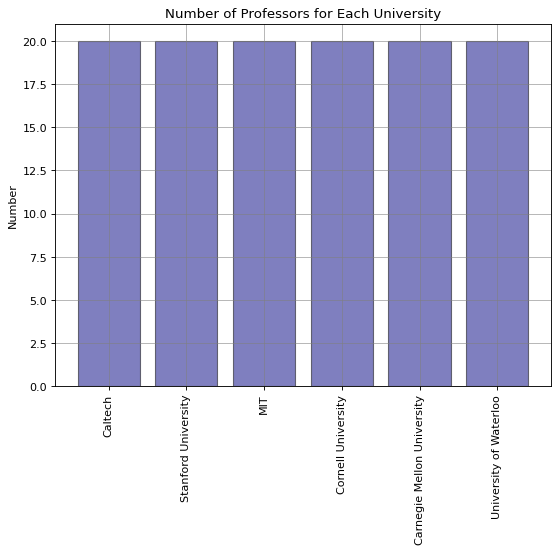

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

universities = adviser_advisee['University'].value_counts()
print("Number of Universities: ", len(universities.index))
print(universities)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (universities.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(universities), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Number ')
plt.title('Number of Students for Each University')

plt.show()


professors = adviser_advisee.groupby('Advisor Website').nth(0)['University'].value_counts()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (professors.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(professors), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Number')
plt.title('Number of Professors for Each University')

print("Number of Professors: ", len(adviser_advisee.groupby('Advisor Website').nth(0)))

plt.show()

# Advisees & Advisors Plots

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]


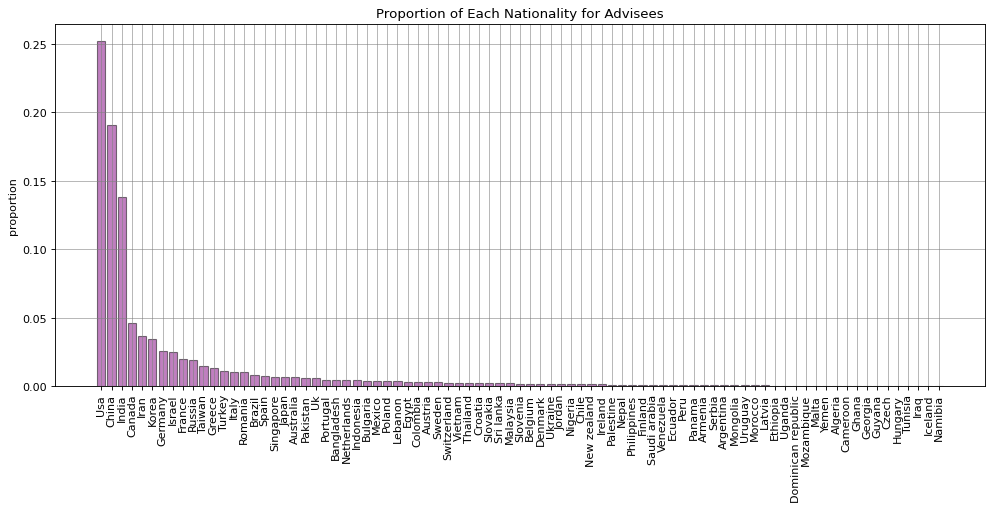

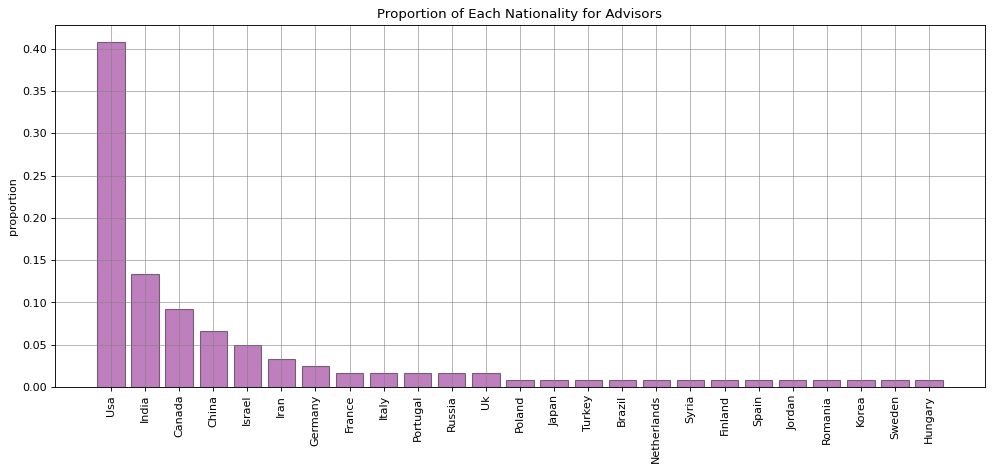

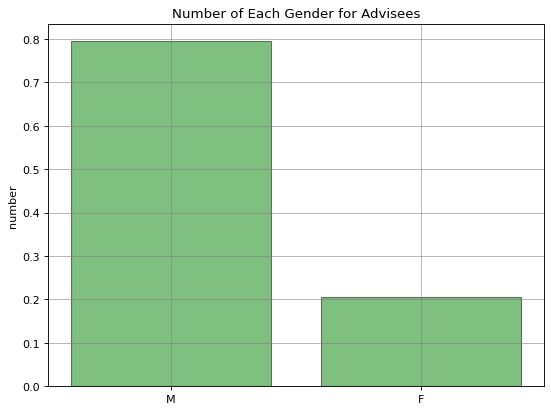

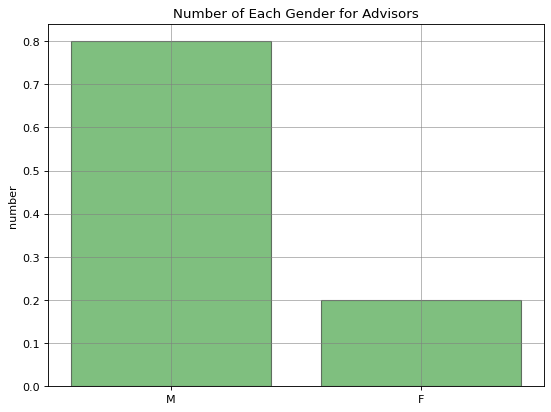

M    96
F    24
Name: Advisor Gender, dtype: int64
M    2072
F     535
Name: Advisee Gender, dtype: int64


In [ ]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')

advisee_nationality = adviser_advisee['Advisee Nationality'].value_counts() / len(adviser_advisee)
objects = (advisee_nationality.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(advisee_nationality), align='center', alpha=0.5, edgecolor='black', color='purple')
plt.xticks(y_pos, objects, rotation=90)
print(y_pos)
plt.ylabel('proportion')
plt.title('Proportion of Each Nationality for Advisees')

plt.show()


advisor_nationality = adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Nationality'].value_counts() / len(adviser_advisee.groupby('Advisor Website').nth(0))
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (advisor_nationality.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(advisor_nationality), align='center', alpha=0.5, edgecolor='black', color='purple')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('proportion')
plt.title('Proportion of Each Nationality for Advisors')

plt.show()


plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')

advisee_gender = adviser_advisee['Advisee Gender'].value_counts() / len(adviser_advisee)
objects = (advisee_gender.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(advisee_gender), align='center', alpha=0.5, edgecolor='black', color='green')
plt.xticks(y_pos, objects)
plt.ylabel('number')
plt.title('Number of Each Gender for Advisees')

plt.show()

advisor_gender = adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Gender'].value_counts() / len(adviser_advisee.groupby('Advisor Website').nth(0))

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (advisor_gender.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(advisor_gender), align='center', alpha=0.5, edgecolor='black', color='green')
plt.xticks(y_pos, objects)
plt.ylabel('number')
plt.title('Number of Each Gender for Advisors')

plt.show()

print(adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Gender'].value_counts())
print(adviser_advisee['Advisee Gender'].value_counts())


In [ ]:
# generate country code  based on country name 
!pip3 install pycountry
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            if country == 'Uk':
              CODE.append('GBR')
            elif country == 'Usa':
              CODE.append('USA')
            elif country == 'Iran':
              CODE.append('IRN')
            elif country == 'Korea':
              CODE.append('KOR')
            elif country == 'Russia':
              CODE.append('RUS')
            elif country == 'Taiwan':
              CODE.append('TWN')
            elif country == 'Vietnam':
              CODE.append('VNM')
            elif country == 'Palestine':
              CODE.append('PSE')
            elif country == 'Venezuela':
              CODE.append('VEN')
            elif country == 'Czech':
              CODE.append('CZE')
            elif country == 'Syria':
              CODE.append('SYR')
            elif country == 'Portuguese':
              CODE.append('PRT')
            else:
              print(country)
              CODE.append('None')
    return CODE


advisee_code = alpha3code(advisee_nationality.index)
advisee_nationality_abr = pd.Series(data=advisee_nationality.values, index=advisee_code).to_frame().reset_index()
advisee_nationality_abr.columns = ['CODE', 'proportion']

advisor_code = alpha3code(advisor_nationality.index)
advisor_nationality_abr = pd.Series(data=advisor_nationality.values, index=advisor_code).to_frame().reset_index()
advisor_nationality_abr.columns = ['CODE', 'proportion']

In [ ]:
! pip3 install geopandas
import geopandas
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge_advisee=pd.merge(world, advisee_nationality_abr, on='CODE', how='left')
merge_advisee['proportion'].fillna(0, inplace=True)

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge_advisee=merge_advisee.merge(location,on='name')
merge_advisor=pd.merge(world,advisor_nationality_abr, on='CODE', how='left')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge_advisor=merge_advisor.merge(location,on='name')
merge_advisor['proportion'].fillna(0, inplace=True)

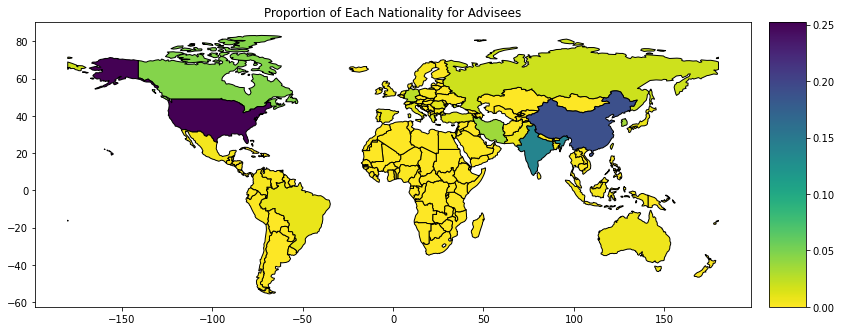

In [ ]:
# plot confirmed cases world map 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_advisee.plot(column='proportion', ax=ax, legend=True, cax=cax, cmap='viridis_r', edgecolor='black');
ax.set_title('Proportion of Each Nationality for Advisees');

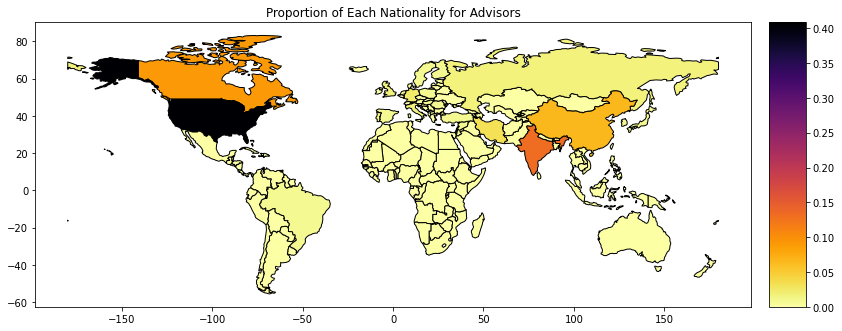

In [ ]:
# plot confirmed cases world map 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_advisor.plot(column='proportion', ax=ax, legend=True, cax=cax, cmap='inferno_r', edgecolor='black');

ax.set_title('Proportion of Each Nationality for Advisors');


# Advisee Advisor Pairs with Same Nationality & Gender

In [ ]:
nationality_proportion = (len(adviser_advisee[adviser_advisee["Advisor Nationality"] == adviser_advisee["Advisee Nationality"]])/len(adviser_advisee))
gender_proportion = (len(adviser_advisee[adviser_advisee["Advisor Gender"] == adviser_advisee["Advisee Gender"]])/len(adviser_advisee))
print("Number of Professor-Student Pairs with the Same Nationality: ", len(adviser_advisee[adviser_advisee["Advisor Nationality"] == adviser_advisee["Advisee Nationality"]]), "Out of Total ", len(adviser_advisee), "(", nationality_proportion*100, "%)") 
print("Number of Professor-Student Pairs with the Same Gender: ", len(adviser_advisee[adviser_advisee["Advisor Gender"] == adviser_advisee["Advisee Gender"]]), "Out of Total ", len(adviser_advisee), "(", gender_proportion*100, "%)")

Number of Professor-Student Pairs with the Same Nationality:  567 Out of Total  2607 ( 21.74913693901036 %)
Number of Professor-Student Pairs with the Same Gender:  1799 Out of Total  2607 ( 69.00652090525509 %)


# Simulation

In [ ]:
from random import choices

n_trials = 10000

def simulate():
  simulation_advisor_advisee = adviser_advisee.copy().iloc[:, :15]
  simulation_advisor_advisee['Advisee Gender'] = advisee_gender.index[choices(np.arange(len(advisee_gender),), advisee_gender.values, k=len(adviser_advisee))]
  simulation_advisor_advisee['Advisee Nationality'] = advisee_nationality.index[choices(np.arange(len(advisee_nationality),), advisee_nationality.values, k=len(adviser_advisee))]
  simulated_nationality_proportion = (len(simulation_advisor_advisee[simulation_advisor_advisee["Advisor Nationality"] == simulation_advisor_advisee["Advisee Nationality"]])/len(simulation_advisor_advisee))
  simulated_gender_proportion = (len(simulation_advisor_advisee[simulation_advisor_advisee["Advisor Gender"] == simulation_advisor_advisee["Advisee Gender"]])/len(simulation_advisor_advisee))
  return (simulated_nationality_proportion, simulated_gender_proportion)

nationality_trial = []
gender_trial = []

for i in range(n_trials):
  n, g = simulate()
  nationality_trial.append(n)
  gender_trial.append(g)



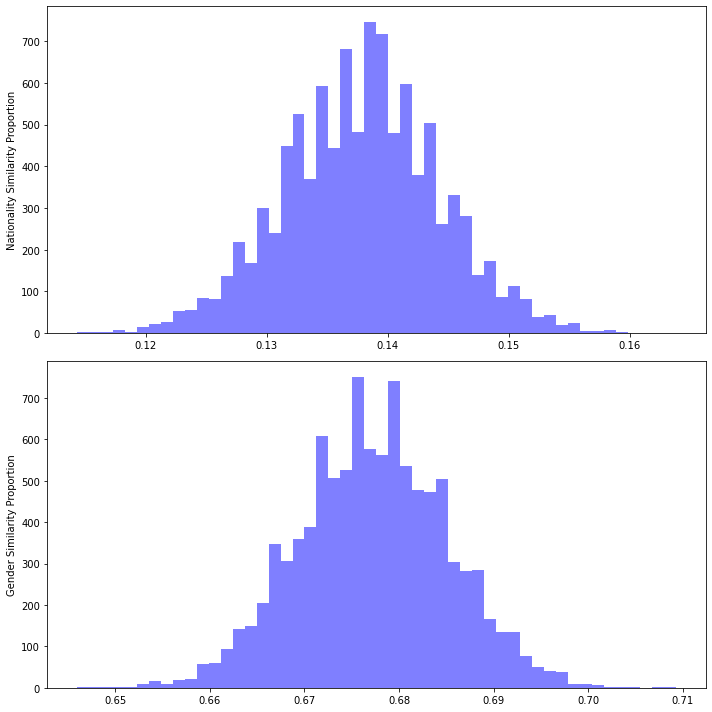

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
objects = (nationality_trial)


ax[0].hist(nationality_trial, 50, facecolor='blue', alpha=0.5)
ax[0].set_ylabel("Nationality Similarity Proportion")

ax[1].hist(gender_trial, 50, facecolor='blue', alpha=0.5)
ax[1].set_ylabel("Gender Similarity Proportion")
fig.tight_layout()

In [ ]:
print(sum(nationality_trial)/len(nationality_trial), sum(gender_trial)/len(gender_trial))

0.13785715381664895 0.6772540084388212


In [ ]:
import numpy as np
nationality_trial = np.array(nationality_trial)
print('pvalue for nationality: ', sum(nationality_trial > nationality_proportion) / n_trials)

gender_trial = np.array(gender_trial)
print('pvalue for gender: ', sum(gender_trial > gender_proportion) / n_trials)


pvalue for nationality:  0.0
pvalue for gender:  0.0508


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
significance = 0.05

sample_success = len(adviser_advisee[adviser_advisee["Advisor Nationality"] == adviser_advisee["Advisee Nationality"]])
sample_size = len(adviser_advisee)
null_hypothesis = sum(nationality_trial)/len(nationality_trial)
# check our sample against Ho for Ha > Ho
# for Ha < Ho use alternative='smaller'
# for Ha != Ho use alternative='two-sided'
stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


z_stat: 9.856, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


In [ ]:
sample_success = len(adviser_advisee[adviser_advisee["Advisor Gender"] == adviser_advisee["Advisee Gender"]])
sample_size = len(adviser_advisee)
null_hypothesis = sum(gender_trial)/len(gender_trial)
# check our sample against Ho for Ha > Ho
# for Ha < Ho use alternative='smaller'
# for Ha != Ho use alternative='two-sided'
stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 1.414, p_value: 0.079
Fail to reject the null hypothesis - we have nothing else to say


# Calculate Average of Success Metrics per Time

In [ ]:
# adviser_advisee.head()
adviser_advisee = adviser_advisee[adviser_advisee['Advisor Citation'].notna()]
print(len(adviser_advisee))

adviser_advisee['Advisor Citation'] = pd.to_numeric(adviser_advisee['Advisor Citation'])


if "Advisor Research Years" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=14, column='Advisor Research Years', value=(2021 - adviser_advisee['Advisor First Paper Year']).astype(float).astype('Int64'))
  adviser_advisee['Advisor Research Years'] = pd.to_numeric(adviser_advisee['Advisor Research Years'])

if "Advisor Average Citation Per Year" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=15, column='Advisor Average Citation Per Year', value=(adviser_advisee['Advisor Citation'] / adviser_advisee['Advisor Research Years']))

if "Advisor Average h-index Per Year" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=16, column='Advisor Average h-index Per Year', value=(adviser_advisee['Advisor h-index'] / adviser_advisee['Advisor Research Years']))

if "Advisor Average Publication Number Per Year" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=17, column='Advisor Average Publication Number Per Year', value=(adviser_advisee['Advisor Publication Number'] / adviser_advisee['Advisor Research Years']))

if "Advisor Average Citation Per Publication Number" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=18, column='Advisor Average Citation Per Publication Number', value=(adviser_advisee['Advisor Citation'] / adviser_advisee['Advisor Publication Number']))

adviser_advisee.head()


2523


,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Website,Advisee Name,Advisee Degree,Advisee Nationality,Advisee Gender,Start Year,End Year,Advisee Previous School,Advisee Citation,Advisee h-index,Advisee Linkedin or Website
0,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,http://www.mit.edu/~gbresler/,Enric Boix-Adserà,PHD,Spain,M,NaN,present,Princeton,37,4,http://web.mit.edu/~eboix/www/
1,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,http://www.mit.edu/~gbresler/,Matthew Brennan,PHD,Usa,M,NaN,present,MIT,123,7,http://www.mit.edu/~brennanm/
2,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,http://www.mit.edu/~gbresler/,Chenghao Guo,PHD,China,M,NaN,present,NaN,<NA>,<NA>,https://www.linkedin.com/in/chenghao-guo-79327...
3,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,http://www.mit.edu/~gbresler/,Brice Huang,PHD,Usa,M,2020.0,present,MIT,<NA>,<NA>,https://www.linkedin.com/in/bricehuang/
4,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,http://www.mit.edu/~gbresler/,Dheeraj Nagaraj,PHD,India,M,NaN,present,IIT Madras,70,5,https://www.linkedin.com/in/dheeraj-m-nagaraj-...


# Calculate Average of Success Metrics per Number of Students

In [ ]:

d = {
     'Advisor Average Citation Per Student': adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Citation'] / adviser_advisee.groupby('Advisor Website').size(),
     'Advisor Average h-index Per Student': adviser_advisee.groupby('Advisor Website').nth(0)['Advisor h-index'] / adviser_advisee.groupby('Advisor Website').size(),
     'Advisor Average Publication Number Per Student': adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Publication Number'] / adviser_advisee.groupby('Advisor Website').size(),
     'Nationality Proportion': adviser_advisee[adviser_advisee["Advisor Nationality"] == adviser_advisee["Advisee Nationality"]].groupby('Advisor Website').size()/adviser_advisee.groupby('Advisor Website').size(),
     'Gender Proportion': adviser_advisee[adviser_advisee["Advisor Gender"] == adviser_advisee["Advisee Gender"]].groupby('Advisor Website').size()/adviser_advisee.groupby('Advisor Website').size()
     }
df = pd.DataFrame(data=d)

result = pd.merge(adviser_advisee.iloc[:, 0:20].groupby("Advisor Website").nth(0), df, on='Advisor Website')
result.insert(22, 'Advisor Website', df.index)
result.reset_index(drop=True, inplace=True)

result['Nationality Proportion'].fillna(0, inplace= True)
result['Gender Proportion'].fillna(0, inplace= True)

if "Advisor Average Citation Per Student" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=19, column='Advisor Average Citation Per Student', value=result['Advisor Average Citation Per Student'])

if "Advisor Average h-index Per Student" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=20, column='Advisor Average h-index Per Student', value=result['Advisor Average h-index Per Student'])

if "Advisor Average Publication Number Per Student" not in adviser_advisee.columns:
  adviser_advisee.insert(loc=21, column='Advisor Average Publication Number Per Student', value=result['Advisor Average Publication Number Per Student'])

# print(result[["Advisor Name", "Nationality Proportion", "Gender Proportion"]])
adviser_advisee.head()

,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Average Citation Per Student,Advisor Average h-index Per Student,Advisor Average Publication Number Per Student,Advisor Website,Advisee Name,Advisee Degree,Advisee Nationality,Advisee Gender,Start Year,End Year,Advisee Previous School,Advisee Citation,Advisee h-index,Advisee Linkedin or Website
0,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,212.437500,1.375000,9.593750,http://www.mit.edu/~gbresler/,Enric Boix-Adserà,PHD,Spain,M,NaN,present,Princeton,37,4,http://web.mit.edu/~eboix/www/
1,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,920.437500,3.750000,18.562500,http://www.mit.edu/~gbresler/,Matthew Brennan,PHD,Usa,M,NaN,present,MIT,123,7,http://www.mit.edu/~brennanm/
2,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,1158.900000,1.666667,11.400000,http://www.mit.edu/~gbresler/,Chenghao Guo,PHD,China,M,NaN,present,NaN,<NA>,<NA>,https://www.linkedin.com/in/chenghao-guo-79327...
3,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,1546.277778,3.777778,11.611111,http://www.mit.edu/~gbresler/,Brice Huang,PHD,Usa,M,2020.0,present,MIT,<NA>,<NA>,https://www.linkedin.com/in/bricehuang/
4,MIT,1,1,EECS,Assistant Professor,Guy Bresler,"information theory,statistics,theoretical comp...",Theoretical CS,Usa,M,1715,16,37,2006,15,114.333333,1.066667,2.466667,46.351351,183.666667,1.666667,7.916667,http://www.mit.edu/~gbresler/,Dheeraj Nagaraj,PHD,India,M,NaN,present,IIT Madras,70,5,https://www.linkedin.com/in/dheeraj-m-nagaraj-...


# Compare Citation with Gender & Nationality Similarity Proportion

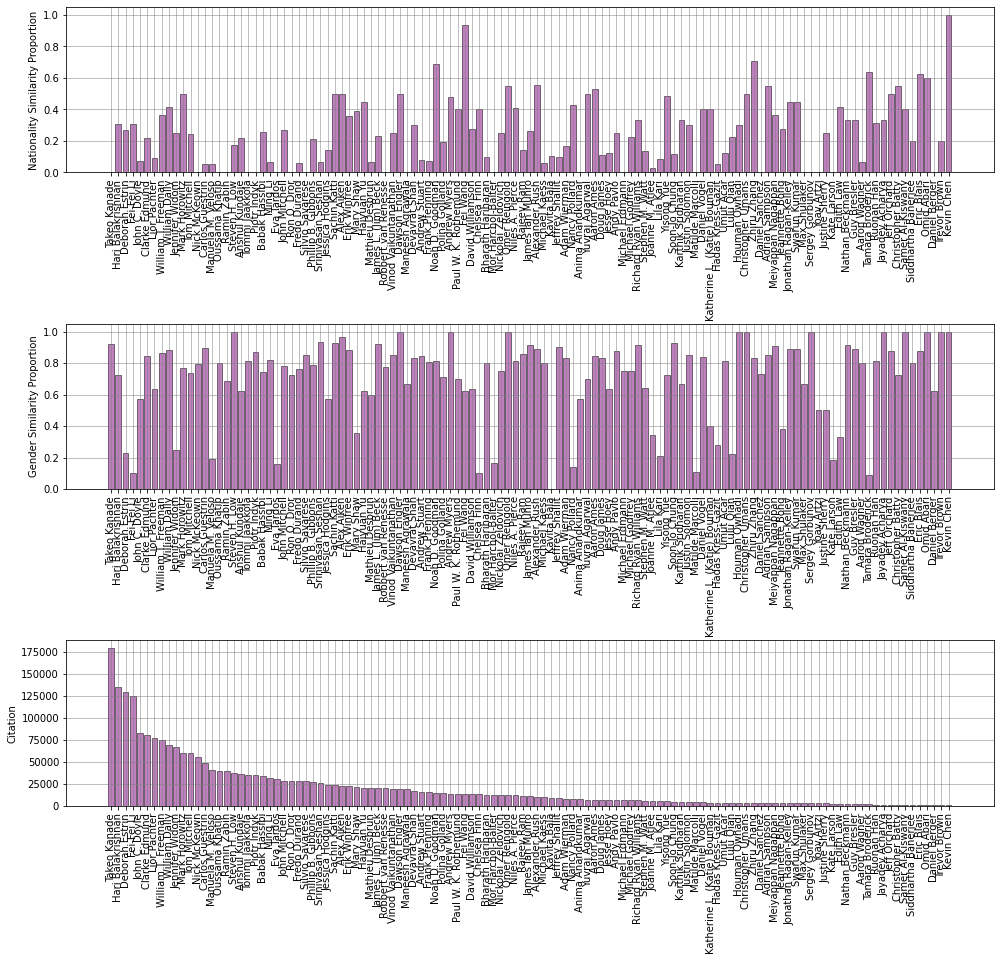

In [ ]:
result.sort_values(by='Advisor Citation', ascending=False, na_position='first', inplace=True)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))
objects = (result["Advisor Name"])
y_pos = np.arange(len(objects))

ax[0].grid(True, linewidth=0.5, color='gray', linestyle='-')
ax[0].bar(objects, list(result["Nationality Proportion"]), align='center', alpha=0.5, edgecolor='black', color='purple')
ax[0].set_xticklabels(objects, rotation=90)
ax[0].set_ylabel("Nationality Similarity Proportion")

ax[1].grid(True, linewidth=0.5, color='gray', linestyle='-')
ax[1].bar(objects, list(result["Gender Proportion"]), align='center', alpha=0.5, edgecolor='black', color='purple')
ax[1].set_xticklabels(objects, rotation=90)
ax[1].set_ylabel("Gender Similarity Proportion")


# print(result["Gender Proportion"])
ax[2].grid(True, linewidth=0.5, color='gray', linestyle='-')
ax[2].bar(objects, list(result["Advisor Citation"]), align='center', alpha=0.5, edgecolor='black', color='purple')
ax[2].set_xticklabels(objects, rotation=90)
ax[2].set_ylabel("Citation")


fig.tight_layout()

fig.subplots_adjust(top=0.95)

In [ ]:
print("correlation between citation and nationality proportion: ", result["Advisor Citation"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between citation and gender proportion: ", result["Advisor Citation"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average citation per year and nationality proportion: ", result["Advisor Average Citation Per Year"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average citation and gender per year proportion: ", result["Advisor Average Citation Per Year"].astype('float64').corr(result["Gender Proportion"].astype('float64')), '\n')

print("correlation between average citation per student and nationality proportion: ", result["Advisor Average Citation Per Student"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average citation per student and gender proportion: ", result["Advisor Average Citation Per Student"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between h-index and nationality proportion: ", result["Advisor h-index"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between h-index and gender proportion: ", result["Advisor h-index"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average h-index per year and nationality proportion: ", result["Advisor Average h-index Per Year"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average h-index per year and gender proportion: ", result["Advisor Average h-index Per Year"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average h-index per student and nationality proportion: ", result["Advisor Average h-index Per Student"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average h-index per student and gender proportion: ", result["Advisor Average h-index Per Student"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between publication number and nationality proportion: ", result["Advisor Publication Number"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between publication number and gender proportion: ", result["Advisor Publication Number"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average publication number per year and nationality proportion: ", result["Advisor Average Publication Number Per Year"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average publication number per year and gender proportion: ", result["Advisor Average Publication Number Per Year"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average publication number per student and nationality proportion: ", result["Advisor Average Publication Number Per Student"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average publication number per student and gender proportion: ", result["Advisor Average Publication Number Per Student"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between average citation per publication number and nationality proportion: ", result["Advisor Average Citation Per Publication Number"].astype('float64').corr(result["Nationality Proportion"].astype('float64')))
print("correlation between average citation per publication number and gender proportion: ", result["Advisor Average Citation Per Publication Number"].astype('float64').corr(result["Gender Proportion"].astype('float64')), "\n")

print("correlation between gender proportion and nationality proportion: ", result["Gender Proportion"].astype('float64').corr(result["Nationality Proportion"].astype('float64')), "\n")

correlation between citation and nationality proportion:  -0.16155962348997527
correlation between citation and gender proportion:  -0.08676650441122473 

correlation between average citation per year and nationality proportion:  -0.12267120953213538
correlation between average citation and gender per year proportion:  -0.15385260932903788 

correlation between average citation per student and nationality proportion:  -0.1254927389377573
correlation between average citation per student and gender proportion:  -0.05303186616303533 

correlation between h-index and nationality proportion:  -0.20068778604278614
correlation between h-index and gender proportion:  -0.020728798004038488 

correlation between average h-index per year and nationality proportion:  -0.08227361376243236
correlation between average h-index per year and gender proportion:  -0.10865782216643781 

correlation between average h-index per student and nationality proportion:  0.11267531023798417
correlation between aver

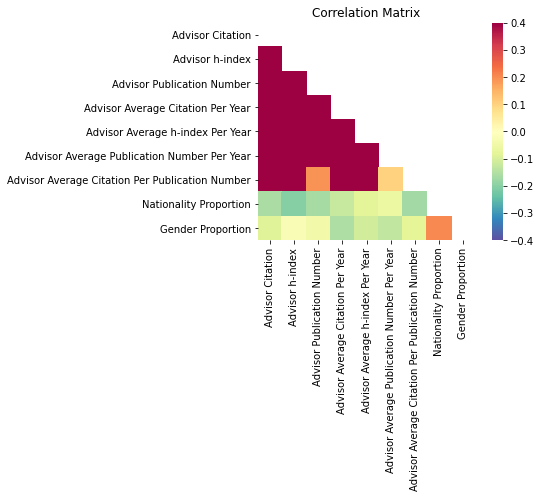

In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr
import seaborn as sns

def kendall_pval(x,y):
  return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[0]

def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]

sub_result = result[['Advisor Citation', 'Advisor h-index', 'Advisor Publication Number', 'Advisor Average Citation Per Year', 'Advisor Average h-index Per Year', 'Advisor Average Publication Number Per Year', 'Advisor Average Citation Per Publication Number', 'Nationality Proportion', 'Gender Proportion']]
corrs = sub_result.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

In [ ]:
corr2 = sub_result.corr(method=spearmanr_pval)
corr2

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Nationality Proportion,Gender Proportion
Advisor Citation,1.000000e+00,2.030125e-59,1.086735e-25,1.015174e-53,3.030740e-13,5.749537e-12,7.509979e-22,0.009455,0.203211
Advisor h-index,2.030125e-59,1.000000e+00,2.671955e-34,5.417160e-36,5.316835e-16,4.995683e-16,2.111230e-12,0.015438,0.495056
Advisor Publication Number,1.086735e-25,2.671955e-34,1.000000e+00,1.800535e-14,1.779811e-06,3.320336e-31,3.231381e-02,0.013628,0.350769
Advisor Average Citation Per Year,1.015174e-53,5.417160e-36,1.800535e-14,1.000000e+00,5.867928e-26,1.049525e-12,3.850498e-28,0.015541,0.131412
Advisor Average h-index Per Year,3.030740e-13,5.316835e-16,1.779811e-06,5.867928e-26,1.000000e+00,5.095910e-15,4.850271e-09,0.096613,0.399742
Advisor Average Publication Number Per Year,5.749537e-12,4.995683e-16,3.320336e-31,1.049525e-12,5.095910e-15,1.000000e+00,6.051725e-01,0.041014,0.124755
Advisor Average Citation Per Publication Number,7.509979e-22,2.111230e-12,3.231381e-02,3.850498e-28,4.850271e-09,6.051725e-01,1.000000e+00,0.069509,0.133655
Nationality Proportion,9.454528e-03,1.543805e-02,1.362795e-02,1.554112e-02,9.661304e-02,4.101356e-02,6.950905e-02,1.000000,0.002434
Gender Proportion,2.032111e-01,4.950564e-01,3.507688e-01,1.314123e-01,3.997416e-01,1.247548e-01,1.336552e-01,0.002434,1.000000


In [ ]:
corr3 = sub_result.corr(method=pearsonr_pval)
corr3

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Nationality Proportion,Gender Proportion
Advisor Citation,1.000000e+00,1.041975e-38,2.327718e-19,2.033436e-46,5.599252e-13,4.290607e-11,4.837047e-18,0.081820,0.352266
Advisor h-index,1.041975e-38,1.000000e+00,1.423736e-31,8.017406e-24,6.297632e-15,1.439397e-15,6.895592e-11,0.030038,0.824444
Advisor Publication Number,2.327718e-19,1.423736e-31,1.000000e+00,2.984000e-11,3.923521e-06,9.824010e-28,3.874816e-02,0.076155,0.662785
Advisor Average Citation Per Year,2.033436e-46,8.017406e-24,2.984000e-11,1.000000e+00,1.620143e-24,3.950890e-13,5.592341e-21,0.187628,0.097686
Advisor Average h-index Per Year,5.599252e-13,6.297632e-15,3.923521e-06,1.620143e-24,1.000000e+00,1.887758e-18,3.475412e-08,0.377849,0.243553
Advisor Average Publication Number Per Year,4.290607e-11,1.439397e-15,9.824010e-28,3.950890e-13,1.887758e-18,1.000000e+00,2.693704e-01,0.533456,0.162897
Advisor Average Citation Per Publication Number,4.837047e-18,6.895592e-11,3.874816e-02,5.592341e-21,3.475412e-08,2.693704e-01,1.000000e+00,0.064199,0.387404
Nationality Proportion,8.181981e-02,3.003814e-02,7.615530e-02,1.876282e-01,3.778489e-01,5.334557e-01,6.419901e-02,1.000000,0.027798
Gender Proportion,3.522663e-01,8.244441e-01,6.627852e-01,9.768556e-02,2.435532e-01,1.628974e-01,3.874037e-01,0.027798,1.000000


In [ ]:
corr4 = sub_result.corr(method=kendall_pval)
corr4

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Nationality Proportion,Gender Proportion
Advisor Citation,1.000000e+00,1.495558e-39,5.003766e-21,1.339545e-36,1.282509e-11,7.941782e-11,2.244707e-18,0.008761,0.205519
Advisor h-index,1.495558e-39,1.000000e+00,1.691132e-26,7.836624e-28,9.679143e-14,2.087063e-14,1.345087e-11,0.019113,0.491020
Advisor Publication Number,5.003766e-21,1.691132e-26,1.000000e+00,4.428982e-13,2.237058e-06,4.120362e-25,3.020853e-02,0.013868,0.366538
Advisor Average Citation Per Year,1.339545e-36,7.836624e-28,4.428982e-13,1.000000e+00,4.181736e-21,2.023903e-11,5.098479e-23,0.015406,0.145785
Advisor Average h-index Per Year,1.282509e-11,9.679143e-14,2.237058e-06,4.181736e-21,1.000000e+00,1.545880e-13,8.296967e-09,0.100914,0.342046
Advisor Average Publication Number Per Year,7.941782e-11,2.087063e-14,4.120362e-25,2.023903e-11,1.545880e-13,1.000000e+00,5.496099e-01,0.038182,0.122545
Advisor Average Citation Per Publication Number,2.244707e-18,1.345087e-11,3.020853e-02,5.098479e-23,8.296967e-09,5.496099e-01,1.000000e+00,0.069849,0.153784
Nationality Proportion,8.760889e-03,1.911255e-02,1.386826e-02,1.540552e-02,1.009140e-01,3.818164e-02,6.984864e-02,1.000000,0.002351
Gender Proportion,2.055193e-01,4.910204e-01,3.665380e-01,1.457847e-01,3.420462e-01,1.225454e-01,1.537837e-01,0.002351,1.000000


# Diversity Metric 1 for Nationality: # of nationalities / # of students

In [ ]:
#Diversity   Such differences can generally include race, ethnicity, gender, age, religion, language, abilities/disabilities, sexual orientation, gender identity, socioeconomic status, and geographic region, and more.

#number of nationalities / number of students
pd.set_option("display.max_rows", None, "display.max_columns", None)

diversity1 = adviser_advisee.groupby('Advisor Website')['Advisee Nationality'].nunique() / adviser_advisee.groupby('Advisor Website').size()
diversity1_df = diversity1.to_frame(name="Diversity")
print(diversity1_df.head())
if "Diversity" not in result.columns:
  result = pd.merge(result, diversity1_df, on='Advisor Website')
  result.reset_index(drop=True, inplace=True)
# print(result.head())

print(result[["Advisor Name", "Diversity"]])

                                                Diversity
Advisor Website                                          
http://ames.caltech.edu/                         0.250000
http://cocolab.stanford.edu/ndg.html             0.312500
http://cva.stanford.edu/billd_webpage_new.html   0.283333
http://drorlab.stanford.edu/                     0.611111
http://edithlaw.ca/index.html                    0.583333
                    Advisor Name  Diversity
0                   Takeo Kanade   0.384615
1              Hari Balakrishnan   0.310345
2                 Deborah Estrin   0.346154
3                     Fei-Fei Li   0.482759
4                  John C. Doyle   0.642857
5                  Clarke Edmund   0.292308
6                   Lior Pachter   0.345455
7             William T. Freeman   0.363636
8                  William Dally   0.283333
9                 Jennifer Widom   0.375000
10                 Mark Horowitz   0.269231
11                  Tom Mitchell   0.442623
12                  Ni

# Calculate Correlation between Diversity1 & Success Metrics

In [ ]:
print("\ncorrelation between citation and nationality diversity1: ", result["Advisor Citation"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average citation per year and nationality diversity1: ", result["Advisor Average Citation Per Year"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average citation per student and nationality diversity1: ", result["Advisor Average Citation Per Student"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average citation per publication number and nationality diversity1: ", result["Advisor Average Citation Per Publication Number"].astype('float64').corr(result["Diversity"].astype('float64')))

print("\ncorrelation between h-index and nationality diversity1: ", result["Advisor h-index"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average h-index per year and nationality diversity1: ", result["Advisor Average h-index Per Year"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average h-index per student and nationality diversity1: ", result["Advisor Average h-index Per Student"].astype('float64').corr(result["Diversity"].astype('float64')))

print("\ncorrelation between publication number and nationality diversity1: ", result["Advisor Publication Number"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average publication number per year and nationality diversity1: ", result["Advisor Average Publication Number Per Year"].astype('float64').corr(result["Diversity"].astype('float64')))
print("\ncorrelation between average publication number per student and nationality diversity1: ", result["Advisor Average Publication Number Per Student"].astype('float64').corr(result["Diversity"].astype('float64')))


correlation between citation and nationality diversity1:  -0.2013749943216815

correlation between average citation per year and nationality diversity1:  -0.19163541415158952

correlation between average citation per student and nationality diversity1:  0.09118300520579431

correlation between average citation per publication number and nationality diversity1:  -0.0914150431135797

correlation between h-index and nationality diversity1:  -0.2888752971268182

correlation between average h-index per year and nationality diversity1:  -0.2286166286296375

correlation between average h-index per student and nationality diversity1:  0.5558136952334094

correlation between publication number and nationality diversity1:  -0.3288438630397245

correlation between average publication number per year and nationality diversity1:  -0.37416545760572945

correlation between average publication number per student and nationality diversity1:  0.24104365076612985


# Simpson Paradox based on University

In [ ]:
result.groupby('University')[['Advisor Citation','Diversity']].corr()

Advisor Citation  Diversity
University                                                              
Caltech                    Advisor Citation          1.000000   0.149784
                           Diversity                 0.149784   1.000000
Carnegie Mellon University Advisor Citation          1.000000  -0.141872
                           Diversity                -0.141872   1.000000
Cornell University         Advisor Citation          1.000000  -0.294197
                           Diversity                -0.294197   1.000000
MIT                        Advisor Citation          1.000000  -0.500779
                           Diversity                -0.500779   1.000000
Stanford University        Advisor Citation          1.000000   0.071374
                           Diversity                 0.071374   1.000000
University of Waterloo     Advisor Citation          1.000000  -0.447660
                           Diversity                -0.447660   1.000000

In [ ]:
result.groupby('University')[['Advisor Average Citation Per Year','Diversity']].corr()

Advisor Average Citation Per Year  \
University                                                                                        
Caltech                    Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                  -0.073461   
Carnegie Mellon University Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                  -0.164199   
Cornell University         Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                  -0.374559   
MIT                        Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                  -0.454172   
Stanford University        Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                   0.250039   
University of Waterloo     Advisor Average Citation Per Year                           1.000000   
                           Diversity                                                  -0.373076   

                                                              Diversity  
University                                                               
Caltech                    Advisor Average Citation Per Year  -0.073461  
                           Diversity                           1.000000  
Carnegie Mellon University Advisor Average Citation Per Year  -0.164199  
                           Diversity                           1.000000  
Cornell University         Advisor Average Citation Per Year  -0.374559  
                           Diversity                           1.000000  
MIT                        Advisor Average Citation Per Year  -0.454172  
                           Diversity                           1.000000  
Stanford University        Advisor Average Citation Per Year   0.250039  
                           Diversity                           1.000000  
University of Waterloo     Advisor Average Citation Per Year  -0.373076  
                           Diversity                           1.000000

In [ ]:
result.groupby('University')[['Advisor Average Citation Per Student','Diversity']].corr()

Advisor Average Citation Per Student  \
University                                                                                              
Caltech                    Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                         0.433216   
Carnegie Mellon University Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                         0.291799   
Cornell University         Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                        -0.127103   
MIT                        Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                        -0.444688   
Stanford University        Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                         0.575304   
University of Waterloo     Advisor Average Citation Per Student                              1.000000   
                           Diversity                                                         0.090670   

                                                                 Diversity  
University                                                                  
Caltech                    Advisor Average Citation Per Student   0.433216  
                           Diversity                              1.000000  
Carnegie Mellon University Advisor Average Citation Per Student   0.291799  
                           Diversity                              1.000000  
Cornell University         Advisor Average Citation Per Student  -0.127103  
                           Diversity                              1.000000  
MIT                        Advisor Average Citation Per Student  -0.444688  
                           Diversity                              1.000000  
Stanford University        Advisor Average Citation Per Student   0.575304  
                           Diversity                              1.000000  
University of Waterloo     Advisor Average Citation Per Student   0.090670  
                           Diversity                              1.000000

In [ ]:
result.groupby('University')[['Advisor h-index','Diversity']].corr()

Advisor h-index  Diversity
University                                                            
Caltech                    Advisor h-index         1.000000  -0.009105
                           Diversity              -0.009105   1.000000
Carnegie Mellon University Advisor h-index         1.000000  -0.094449
                           Diversity              -0.094449   1.000000
Cornell University         Advisor h-index         1.000000  -0.346130
                           Diversity              -0.346130   1.000000
MIT                        Advisor h-index         1.000000  -0.633824
                           Diversity              -0.633824   1.000000
Stanford University        Advisor h-index         1.000000  -0.195124
                           Diversity              -0.195124   1.000000
University of Waterloo     Advisor h-index         1.000000  -0.448548
                           Diversity              -0.448548   1.000000

In [ ]:
result.groupby('University')[['Advisor Average h-index Per Year','Diversity']].corr()

Advisor Average h-index Per Year  \
University                                                                                      
Caltech                    Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                -0.672990   
Carnegie Mellon University Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                -0.348239   
Cornell University         Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                -0.268560   
MIT                        Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                -0.504524   
Stanford University        Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                 0.258415   
University of Waterloo     Advisor Average h-index Per Year                          1.000000   
                           Diversity                                                 0.142747   

                                                             Diversity  
University                                                              
Caltech                    Advisor Average h-index Per Year  -0.672990  
                           Diversity                          1.000000  
Carnegie Mellon University Advisor Average h-index Per Year  -0.348239  
                           Diversity                          1.000000  
Cornell University         Advisor Average h-index Per Year  -0.268560  
                           Diversity                          1.000000  
MIT                        Advisor Average h-index Per Year  -0.504524  
                           Diversity                          1.000000  
Stanford University        Advisor Average h-index Per Year   0.258415  
                           Diversity                          1.000000  
University of Waterloo     Advisor Average h-index Per Year   0.142747  
                           Diversity                          1.000000

In [ ]:
result.groupby('University')[['Advisor Average h-index Per Student','Diversity']].corr()

Advisor Average h-index Per Student  \
University                                                                                            
Caltech                    Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.522628   
Carnegie Mellon University Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.757127   
Cornell University         Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.606491   
MIT                        Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.492123   
Stanford University        Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.626724   
University of Waterloo     Advisor Average h-index Per Student                             1.000000   
                           Diversity                                                       0.712891   

                                                                Diversity  
University                                                                 
Caltech                    Advisor Average h-index Per Student   0.522628  
                           Diversity                             1.000000  
Carnegie Mellon University Advisor Average h-index Per Student   0.757127  
                           Diversity                             1.000000  
Cornell University         Advisor Average h-index Per Student   0.606491  
                           Diversity                             1.000000  
MIT                        Advisor Average h-index Per Student   0.492123  
                           Diversity                             1.000000  
Stanford University        Advisor Average h-index Per Student   0.626724  
                           Diversity                             1.000000  
University of Waterloo     Advisor Average h-index Per Student   0.712891  
                           Diversity                             1.000000

In [ ]:
result.groupby('University')[['Advisor Publication Number','Diversity']].corr()

Advisor Publication Number  \
University                                                                          
Caltech                    Advisor Publication Number                    1.000000   
                           Diversity                                    -0.025656   
Carnegie Mellon University Advisor Publication Number                    1.000000   
                           Diversity                                    -0.156520   
Cornell University         Advisor Publication Number                    1.000000   
                           Diversity                                    -0.388046   
MIT                        Advisor Publication Number                    1.000000   
                           Diversity                                    -0.591508   
Stanford University        Advisor Publication Number                    1.000000   
                           Diversity                                    -0.333817   
University of Waterloo     Advisor Publication Number                    1.000000   
                           Diversity                                    -0.437139   

                                                       Diversity  
University                                                        
Caltech                    Advisor Publication Number  -0.025656  
                           Diversity                    1.000000  
Carnegie Mellon University Advisor Publication Number  -0.156520  
                           Diversity                    1.000000  
Cornell University         Advisor Publication Number  -0.388046  
                           Diversity                    1.000000  
MIT                        Advisor Publication Number  -0.591508  
                           Diversity                    1.000000  
Stanford University        Advisor Publication Number  -0.333817  
                           Diversity                    1.000000  
University of Waterloo     Advisor Publication Number  -0.437139  
                           Diversity                    1.000000

In [ ]:
result.groupby('University')[['Advisor Average Publication Number Per Year','Diversity']].corr()

Advisor Average Publication Number Per Year  \
University                                                                                                            
Caltech                    Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.493320   
Carnegie Mellon University Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.239959   
Cornell University         Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.465879   
MIT                        Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.621200   
Stanford University        Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.085408   
University of Waterloo     Advisor Average Publication Number Per Year                                     1.000000   
                           Diversity                                                                      -0.454420   

                                                                        Diversity  
University                                                                         
Caltech                    Advisor Average Publication Number Per Year  -0.493320  
                           Diversity                                     1.000000  
Carnegie Mellon University Advisor Average Publication Number Per Year  -0.239959  
                           Diversity                                     1.000000  
Cornell University         Advisor Average Publication Number Per Year  -0.465879  
                           Diversity                                     1.000000  
MIT                        Advisor Average Publication Number Per Year  -0.621200  
                           Diversity                                     1.000000  
Stanford University        Advisor Average Publication Number Per Year  -0.085408  
                           Diversity                                     1.000000  
University of Waterloo     Advisor Average Publication Number Per Year  -0.454420  
                           Diversity                                     1.000000

In [ ]:
result.groupby('University')[['Advisor Average Publication Number Per Student','Diversity']].corr()

Advisor Average Publication Number Per Student  \
University                                                                                                                  
Caltech                    Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                             0.345995   
Carnegie Mellon University Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                             0.531746   
Cornell University         Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                             0.223072   
MIT                        Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                            -0.076088   
Stanford University        Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                             0.341278   
University of Waterloo     Advisor Average Publication Number Per Student                                        1.000000   
                           Diversity                                                                             0.235297   

                                                                           Diversity  
University                                                                            
Caltech                    Advisor Average Publication Number Per Student   0.345995  
                           Diversity                                        1.000000  
Carnegie Mellon University Advisor Average Publication Number Per Student   0.531746  
                           Diversity                                        1.000000  
Cornell University         Advisor Average Publication Number Per Student   0.223072  
                           Diversity                                        1.000000  
MIT                        Advisor Average Publication Number Per Student  -0.076088  
                           Diversity                                        1.000000  
Stanford University        Advisor Average Publication Number Per Student   0.341278  
                           Diversity                                        1.000000  
University of Waterloo     Advisor Average Publication Number Per Student   0.235297  
                           Diversity                                        1.000000

# Diversity Metric2 for Nationality: Entropy of Nationality Distribution

### the more the entropy, the more the diversity

In [ ]:
nationality_distribution = adviser_advisee.groupby(['Advisor Website', 'Advisee Nationality']).size() / adviser_advisee.groupby('Advisor Website').size()
# print(nationality_distribution)
advisee_nationality_distribution = []
for idx, advisor in enumerate(result["Advisor Website"]):
  advisee_nationality_distribution.append(pd.concat([nationality_distribution[advisor], advisee_nationality.index.to_series()], axis=1).fillna(0)[0].values)

advisee_nationality_distribution = np.asarray(advisee_nationality_distribution, dtype=np.float32)

In [ ]:
from scipy.stats import entropy

advisor_entropy = pd.Series(np.apply_along_axis(entropy, 1, advisee_nationality_distribution), index =result["Advisor Website"]) 

if "Advisor Nationality Entropy" not in result.columns:
  result = pd.merge(result, advisor_entropy.to_frame(name="Advisor Nationality Entropy"), on='Advisor Website')
  result.reset_index(drop=True, inplace=True)
result.head()

,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Average Citation Per Student,Advisor Average h-index Per Student,Advisor Average Publication Number Per Student,Advisor Website,Nationality Proportion,Gender Proportion,Diversity,Advisor Nationality Entropy
0,Carnegie Mellon University,3,3,CS,Professor,Takeo Kanade,"Computer Vision,Multi-Media Technology,Robotics",AI-Computer Graphics,Japan,M,178786,171,690,1971,50,3575.720000,3.420000,13.800000,259.110145,6876.384615,6.576923,26.538462,https://www.ri.cmu.edu/ri-faculty/takeo-kanade/,0.000000,0.923077,0.384615,2.031332
1,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,26,5179.769231,4.692308,18.192308,284.723044,4643.931034,4.206897,16.310345,http://nms.csail.mit.edu/~hari/,0.310345,0.724138,0.310345,1.662203
2,Cornell University,19,11,CS,Professor,Deborah Estrin,"digital health,mobile sensing,Internet archite...",Communication & Security-Computer Architecture...,Usa,F,129279,131,787,1981,40,3231.975000,3.275000,19.675000,164.268107,2486.134615,2.519231,15.134615,https://destrin.tech.cornell.edu/,0.269231,0.230769,0.346154,2.380569
3,Stanford University,2,2,CS,Sequoia Professor,Fei-Fei Li,"Artificial Intelligence,Machine Learning,Compu...",AI-Scientific Computing,China,F,124674,115,458,1999,22,5667.000000,5.227273,20.818182,272.213974,4299.103448,3.965517,15.793103,https://profiles.stanford.edu/fei-fei-li,0.310345,0.103448,0.482759,2.216696
4,Caltech,29,16,CS,Jean-Lou Chameau Professor,John C. Doyle,"control,systems,biology,networks,theory",Scientific Computing-Theoretical CS,Usa,M,82758,98,583,1964,57,1451.894737,1.719298,10.228070,141.951973,5911.285714,7.000000,41.642857,http://www.cds.caltech.edu/~doyle/wiki/index.p...,0.071429,0.571429,0.642857,2.007556


In [ ]:
print("correlation between citation and entropy: ", result["Advisor Citation"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average citation per year and entropy: ", result["Advisor Average Citation Per Year"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average citation per student and entropy: ", result["Advisor Average Citation Per Student"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average citation per publication number and entropy: ", result["Advisor Average Citation Per Publication Number"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between h-index and entropy: ", result["Advisor h-index"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average h-index per year and entropy: ", result["Advisor Average h-index Per Year"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average h-index per student and entropy: ", result["Advisor Average h-index Per Student"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between publication number and entropy: ", result["Advisor Publication Number"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average publication number per year and entropy: ", result["Advisor Average Publication Number Per Year"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

print("correlation between average publication number per student and entropy: ", result["Advisor Average Publication Number Per Student"].astype('float64').corr(result["Advisor Nationality Entropy"].astype('float64')))

correlation between citation and entropy:  0.3549549817141079
correlation between average citation per year and entropy:  0.2998361964827424
correlation between average citation per student and entropy:  0.09770005139874519
correlation between average citation per publication number and entropy:  0.2541706083570775
correlation between h-index and entropy:  0.43862275909831705
correlation between average h-index per year and entropy:  0.1521050837212188
correlation between average h-index per student and entropy:  -0.36431215155574653
correlation between publication number and entropy:  0.42317411062802496
correlation between average publication number per year and entropy:  0.26837888252622083
correlation between average publication number per student and entropy:  -0.15490638590645853


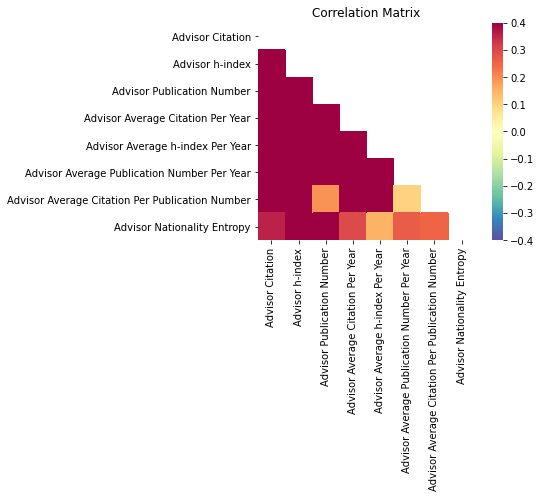

In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr
import seaborn as sns

def kendall_pval(x,y):
  return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[0]

def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]

sub_result = result[['Advisor Citation', 'Advisor h-index', 'Advisor Publication Number', 'Advisor Average Citation Per Year', 'Advisor Average h-index Per Year', 'Advisor Average Publication Number Per Year', 'Advisor Average Citation Per Publication Number', 'Advisor Nationality Entropy']]
corrs = sub_result.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

In [ ]:
corr2 = sub_result.corr(method=spearmanr_pval)
corr2

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Nationality Entropy
Advisor Citation,1.000000e+00,2.030125e-59,1.086735e-25,1.015174e-53,3.030740e-13,5.749537e-12,7.509979e-22,3.335013e-08
Advisor h-index,2.030125e-59,1.000000e+00,2.671955e-34,5.417160e-36,5.316835e-16,4.995683e-16,2.111230e-12,8.574638e-09
Advisor Publication Number,1.086735e-25,2.671955e-34,1.000000e+00,1.800535e-14,1.779811e-06,3.320336e-31,3.231381e-02,5.660580e-11
Advisor Average Citation Per Year,1.015174e-53,5.417160e-36,1.800535e-14,1.000000e+00,5.867928e-26,1.049525e-12,3.850498e-28,5.556714e-05
Advisor Average h-index Per Year,3.030740e-13,5.316835e-16,1.779811e-06,5.867928e-26,1.000000e+00,5.095910e-15,4.850271e-09,3.679600e-02
Advisor Average Publication Number Per Year,5.749537e-12,4.995683e-16,3.320336e-31,1.049525e-12,5.095910e-15,1.000000e+00,6.051725e-01,1.243125e-06
Advisor Average Citation Per Publication Number,7.509979e-22,2.111230e-12,3.231381e-02,3.850498e-28,4.850271e-09,6.051725e-01,1.000000e+00,3.578684e-02
Advisor Nationality Entropy,3.335013e-08,8.574638e-09,5.660580e-11,5.556714e-05,3.679600e-02,1.243125e-06,3.578684e-02,1.000000e+00


In [ ]:
corr3 = sub_result.corr(method=pearsonr_pval)
corr3

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Nationality Entropy
Advisor Citation,1.000000e+00,1.041975e-38,2.327718e-19,2.033436e-46,5.599252e-13,4.290607e-11,4.837047e-18,8.606033e-05
Advisor h-index,1.041975e-38,1.000000e+00,1.423736e-31,8.017406e-24,6.297632e-15,1.439397e-15,6.895592e-11,7.555326e-07
Advisor Publication Number,2.327718e-19,1.423736e-31,1.000000e+00,2.984000e-11,3.923521e-06,9.824010e-28,3.874816e-02,1.999455e-06
Advisor Average Citation Per Year,2.033436e-46,8.017406e-24,2.984000e-11,1.000000e+00,1.620143e-24,3.950890e-13,5.592341e-21,1.022329e-03
Advisor Average h-index Per Year,5.599252e-13,6.297632e-15,3.923521e-06,1.620143e-24,1.000000e+00,1.887758e-18,3.475412e-08,1.016004e-01
Advisor Average Publication Number Per Year,4.290607e-11,1.439397e-15,9.824010e-28,3.950890e-13,1.887758e-18,1.000000e+00,2.693704e-01,3.437201e-03
Advisor Average Citation Per Publication Number,4.837047e-18,6.895592e-11,3.874816e-02,5.592341e-21,3.475412e-08,2.693704e-01,1.000000e+00,5.686627e-03
Advisor Nationality Entropy,8.606033e-05,7.555326e-07,1.999455e-06,1.022329e-03,1.016004e-01,3.437201e-03,5.686627e-03,1.000000e+00


In [ ]:
corr4 = sub_result.corr(method=kendall_pval)
corr4

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Nationality Entropy
Advisor Citation,1.000000e+00,1.495558e-39,5.003766e-21,1.339545e-36,1.282509e-11,7.941782e-11,2.244707e-18,9.150704e-08
Advisor h-index,1.495558e-39,1.000000e+00,1.691132e-26,7.836624e-28,9.679143e-14,2.087063e-14,1.345087e-11,5.070251e-08
Advisor Publication Number,5.003766e-21,1.691132e-26,1.000000e+00,4.428982e-13,2.237058e-06,4.120362e-25,3.020853e-02,3.268274e-10
Advisor Average Citation Per Year,1.339545e-36,7.836624e-28,4.428982e-13,1.000000e+00,4.181736e-21,2.023903e-11,5.098479e-23,6.332788e-05
Advisor Average h-index Per Year,1.282509e-11,9.679143e-14,2.237058e-06,4.181736e-21,1.000000e+00,1.545880e-13,8.296967e-09,4.133122e-02
Advisor Average Publication Number Per Year,7.941782e-11,2.087063e-14,4.120362e-25,2.023903e-11,1.545880e-13,1.000000e+00,5.496099e-01,2.402582e-06
Advisor Average Citation Per Publication Number,2.244707e-18,1.345087e-11,3.020853e-02,5.098479e-23,8.296967e-09,5.496099e-01,1.000000e+00,3.399169e-02
Advisor Nationality Entropy,9.150704e-08,5.070251e-08,3.268274e-10,6.332788e-05,4.133122e-02,2.402582e-06,3.399169e-02,1.000000e+00


# Diversity Metric for Gender: # of opposite gender/ # of students

In [ ]:
# print(adviser_advisee.groupby('Advisor Website')['Advisee Gender'].value_counts(normalize=True))
if "Gender Diversity" not in result.columns:
  result = pd.merge(result, (adviser_advisee[adviser_advisee['Advisor Gender'] != adviser_advisee['Advisee Gender']].groupby('Advisor Website').size() / adviser_advisee.groupby('Advisor Website').size()).fillna(0).to_frame(name="Gender Diversity"), on='Advisor Website').fillna(0)
  result.reset_index(drop=True, inplace=True)
result.head()

,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Average Citation Per Student,Advisor Average h-index Per Student,Advisor Average Publication Number Per Student,Advisor Website,Nationality Proportion,Gender Proportion,Diversity,Advisor Nationality Entropy,Gender Diversity
0,Carnegie Mellon University,3,3,CS,Professor,Takeo Kanade,"Computer Vision,Multi-Media Technology,Robotics",AI-Computer Graphics,Japan,M,178786,171,690,1971,50,3575.720000,3.420000,13.800000,259.110145,6876.384615,6.576923,26.538462,https://www.ri.cmu.edu/ri-faculty/takeo-kanade/,0.000000,0.923077,0.384615,2.031332,0.076923
1,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,26,5179.769231,4.692308,18.192308,284.723044,4643.931034,4.206897,16.310345,http://nms.csail.mit.edu/~hari/,0.310345,0.724138,0.310345,1.662203,0.275862
2,Cornell University,19,11,CS,Professor,Deborah Estrin,"digital health,mobile sensing,Internet archite...",Communication & Security-Computer Architecture...,Usa,F,129279,131,787,1981,40,3231.975000,3.275000,19.675000,164.268107,2486.134615,2.519231,15.134615,https://destrin.tech.cornell.edu/,0.269231,0.230769,0.346154,2.380569,0.769231
3,Stanford University,2,2,CS,Sequoia Professor,Fei-Fei Li,"Artificial Intelligence,Machine Learning,Compu...",AI-Scientific Computing,China,F,124674,115,458,1999,22,5667.000000,5.227273,20.818182,272.213974,4299.103448,3.965517,15.793103,https://profiles.stanford.edu/fei-fei-li,0.310345,0.103448,0.482759,2.216696,0.896552
4,Caltech,29,16,CS,Jean-Lou Chameau Professor,John C. Doyle,"control,systems,biology,networks,theory",Scientific Computing-Theoretical CS,Usa,M,82758,98,583,1964,57,1451.894737,1.719298,10.228070,141.951973,5911.285714,7.000000,41.642857,http://www.cds.caltech.edu/~doyle/wiki/index.p...,0.071429,0.571429,0.642857,2.007556,0.428571


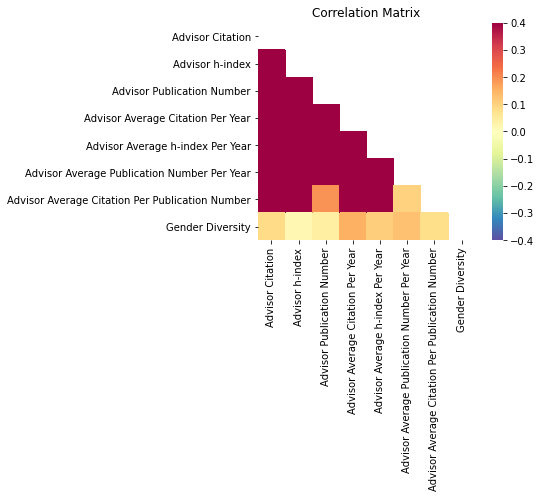

In [ ]:
sub_result2 = result[['Advisor Citation', 'Advisor h-index', 'Advisor Publication Number', 'Advisor Average Citation Per Year', 'Advisor Average h-index Per Year', 'Advisor Average Publication Number Per Year', 'Advisor Average Citation Per Publication Number', 'Gender Diversity']]

sub_result2.head()

corrs = sub_result2.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

In [ ]:
corr2 = sub_result2.corr(method=spearmanr_pval)
corr2

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Gender Diversity
Advisor Citation,1.000000e+00,2.030125e-59,1.086735e-25,1.015174e-53,3.030740e-13,5.749537e-12,7.509979e-22,0.203211
Advisor h-index,2.030125e-59,1.000000e+00,2.671955e-34,5.417160e-36,5.316835e-16,4.995683e-16,2.111230e-12,0.495056
Advisor Publication Number,1.086735e-25,2.671955e-34,1.000000e+00,1.800535e-14,1.779811e-06,3.320336e-31,3.231381e-02,0.350769
Advisor Average Citation Per Year,1.015174e-53,5.417160e-36,1.800535e-14,1.000000e+00,5.867928e-26,1.049525e-12,3.850498e-28,0.131412
Advisor Average h-index Per Year,3.030740e-13,5.316835e-16,1.779811e-06,5.867928e-26,1.000000e+00,5.095910e-15,4.850271e-09,0.399742
Advisor Average Publication Number Per Year,5.749537e-12,4.995683e-16,3.320336e-31,1.049525e-12,5.095910e-15,1.000000e+00,6.051725e-01,0.124755
Advisor Average Citation Per Publication Number,7.509979e-22,2.111230e-12,3.231381e-02,3.850498e-28,4.850271e-09,6.051725e-01,1.000000e+00,0.133655
Gender Diversity,2.032111e-01,4.950564e-01,3.507688e-01,1.314123e-01,3.997416e-01,1.247548e-01,1.336552e-01,1.000000


In [ ]:
corr3 = sub_result2.corr(method=pearsonr_pval)
corr3

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Gender Diversity
Advisor Citation,1.000000e+00,1.041975e-38,2.327718e-19,2.033436e-46,5.599252e-13,4.290607e-11,4.837047e-18,0.352266
Advisor h-index,1.041975e-38,1.000000e+00,1.423736e-31,8.017406e-24,6.297632e-15,1.439397e-15,6.895592e-11,0.824444
Advisor Publication Number,2.327718e-19,1.423736e-31,1.000000e+00,2.984000e-11,3.923521e-06,9.824010e-28,3.874816e-02,0.662785
Advisor Average Citation Per Year,2.033436e-46,8.017406e-24,2.984000e-11,1.000000e+00,1.620143e-24,3.950890e-13,5.592341e-21,0.097686
Advisor Average h-index Per Year,5.599252e-13,6.297632e-15,3.923521e-06,1.620143e-24,1.000000e+00,1.887758e-18,3.475412e-08,0.243553
Advisor Average Publication Number Per Year,4.290607e-11,1.439397e-15,9.824010e-28,3.950890e-13,1.887758e-18,1.000000e+00,2.693704e-01,0.162897
Advisor Average Citation Per Publication Number,4.837047e-18,6.895592e-11,3.874816e-02,5.592341e-21,3.475412e-08,2.693704e-01,1.000000e+00,0.387404
Gender Diversity,3.522663e-01,8.244441e-01,6.627852e-01,9.768556e-02,2.435532e-01,1.628974e-01,3.874037e-01,1.000000


In [ ]:
corr4 = sub_result2.corr(method=kendall_pval)
corr4

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Gender Diversity
Advisor Citation,1.000000e+00,1.495558e-39,5.003766e-21,1.339545e-36,1.282509e-11,7.941782e-11,2.244707e-18,0.205519
Advisor h-index,1.495558e-39,1.000000e+00,1.691132e-26,7.836624e-28,9.679143e-14,2.087063e-14,1.345087e-11,0.491020
Advisor Publication Number,5.003766e-21,1.691132e-26,1.000000e+00,4.428982e-13,2.237058e-06,4.120362e-25,3.020853e-02,0.366538
Advisor Average Citation Per Year,1.339545e-36,7.836624e-28,4.428982e-13,1.000000e+00,4.181736e-21,2.023903e-11,5.098479e-23,0.145785
Advisor Average h-index Per Year,1.282509e-11,9.679143e-14,2.237058e-06,4.181736e-21,1.000000e+00,1.545880e-13,8.296967e-09,0.342046
Advisor Average Publication Number Per Year,7.941782e-11,2.087063e-14,4.120362e-25,2.023903e-11,1.545880e-13,1.000000e+00,5.496099e-01,0.122545
Advisor Average Citation Per Publication Number,2.244707e-18,1.345087e-11,3.020853e-02,5.098479e-23,8.296967e-09,5.496099e-01,1.000000e+00,0.153784
Gender Diversity,2.055193e-01,4.910204e-01,3.665380e-01,1.457847e-01,3.420462e-01,1.225454e-01,1.537837e-01,1.000000


# Diversity Metric for Gender: Entropy of gender probability distribution

In [ ]:
gender_distribution = adviser_advisee.groupby(['Advisor Website', 'Advisee Gender']).size() / adviser_advisee.groupby('Advisor Website').size()
advisee_gender_distribution = []
advisee_gender = adviser_advisee['Advisee Gender'].value_counts() / len(adviser_advisee)

for idx, advisor in enumerate(result["Advisor Website"]):
  advisee_gender_distribution.append(pd.concat([gender_distribution[advisor], advisee_gender.index.to_series()], axis=1).fillna(0)[0].values)

advisee_gender_distribution = np.asarray(advisee_gender_distribution, dtype=np.float32)

In [ ]:
advisor_gender_entropy = pd.Series(np.apply_along_axis(entropy, 1, advisee_gender_distribution), index =result["Advisor Website"]) 

if "Advisor Gender Entropy" not in result.columns:
  result = pd.merge(result, advisor_gender_entropy.to_frame(name="Advisor Gender Entropy"), on='Advisor Website')
  result.reset_index(drop=True, inplace=True)
result.head()

,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Average Citation Per Student,Advisor Average h-index Per Student,Advisor Average Publication Number Per Student,Advisor Website,Nationality Proportion,Gender Proportion,Diversity,Advisor Nationality Entropy,Advisor Gender Entropy
0,Carnegie Mellon University,3,3,CS,Professor,Takeo Kanade,"Computer Vision,Multi-Media Technology,Robotics",AI-Computer Graphics,Japan,M,178786,171,690,1971,50,3575.720000,3.420000,13.800000,259.110145,6876.384615,6.576923,26.538462,https://www.ri.cmu.edu/ri-faculty/takeo-kanade/,0.000000,0.923077,0.384615,2.031332,0.271189
1,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,26,5179.769231,4.692308,18.192308,284.723044,4643.931034,4.206897,16.310345,http://nms.csail.mit.edu/~hari/,0.310345,0.724138,0.310345,1.662203,0.589003
2,Cornell University,19,11,CS,Professor,Deborah Estrin,"digital health,mobile sensing,Internet archite...",Communication & Security-Computer Architecture...,Usa,F,129279,131,787,1981,40,3231.975000,3.275000,19.675000,164.268107,2486.134615,2.519231,15.134615,https://destrin.tech.cornell.edu/,0.269231,0.230769,0.346154,2.380569,0.540204
3,Stanford University,2,2,CS,Sequoia Professor,Fei-Fei Li,"Artificial Intelligence,Machine Learning,Compu...",AI-Scientific Computing,China,F,124674,115,458,1999,22,5667.000000,5.227273,20.818182,272.213974,4299.103448,3.965517,15.793103,https://profiles.stanford.edu/fei-fei-li,0.310345,0.103448,0.482759,2.216696,0.332594
4,Caltech,29,16,CS,Jean-Lou Chameau Professor,John C. Doyle,"control,systems,biology,networks,theory",Scientific Computing-Theoretical CS,Usa,M,82758,98,583,1964,57,1451.894737,1.719298,10.228070,141.951973,5911.285714,7.000000,41.642857,http://www.cds.caltech.edu/~doyle/wiki/index.p...,0.071429,0.571429,0.642857,2.007556,0.682908


In [ ]:
result.columns

Index(['University', 'World Field Ranking', 'North US Field Ranking',
       'Department', 'Advisor Role', 'Advisor Name', 'Advisor Field',
       'Advisor CS Subfield', 'Advisor Nationality', 'Advisor Gender',
       'Advisor Citation', 'Advisor h-index', 'Advisor Publication Number',
       'Advisor First Paper Year', 'Advisor Research Years',
       'Advisor Average Citation Per Year', 'Advisor Average h-index Per Year',
       'Advisor Average Publication Number Per Year',
       'Advisor Average Citation Per Publication Number',
       'Advisor Average Citation Per Student',
       'Advisor Average h-index Per Student',
       'Advisor Average Publication Number Per Student', 'Advisor Website',
       'Nationality Proportion', 'Gender Proportion', 'Diversity',
       'Advisor Nationality Entropy', 'Advisor Gender Entropy'],
      dtype='object')

In [ ]:
print("correlation between citation and gender entropy: ", result["Advisor Citation"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average citation per year and gender entropy: ", result["Advisor Average Citation Per Year"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average citation per student and gender entropy: ", result["Advisor Average Citation Per Student"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average citation per publication number and gender entropy: ", result["Advisor Average Citation Per Publication Number"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between h-index and gender entropy: ", result["Advisor h-index"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average h-index per year and gender entropy: ", result["Advisor Average h-index Per Year"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average h-index per student and gender entropy: ", result["Advisor Average h-index Per Student"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between publication number and gender entropy: ", result["Advisor Publication Number"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average publication number per year and gender entropy: ", result["Advisor Average Publication Number Per Year"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

print("correlation between average publication number per student and gender entropy: ", result["Advisor Average Publication Number Per Student"].astype('float64').corr(result["Advisor Gender Entropy"].astype('float64')))

correlation between citation and gender entropy:  0.08915334998702397
correlation between average citation per year and gender entropy:  0.1006770351479561
correlation between average citation per student and gender entropy:  0.03422627095346238
correlation between average citation per publication number and gender entropy:  0.1824357949181556
correlation between h-index and gender entropy:  0.09741814489426141
correlation between average h-index per year and gender entropy:  0.11265526646014809
correlation between average h-index per student and gender entropy:  -0.16860785977146117
correlation between publication number and gender entropy:  0.08447798597222565
correlation between average publication number per year and gender entropy:  0.10807924636134875
correlation between average publication number per student and gender entropy:  -0.0857779083908801


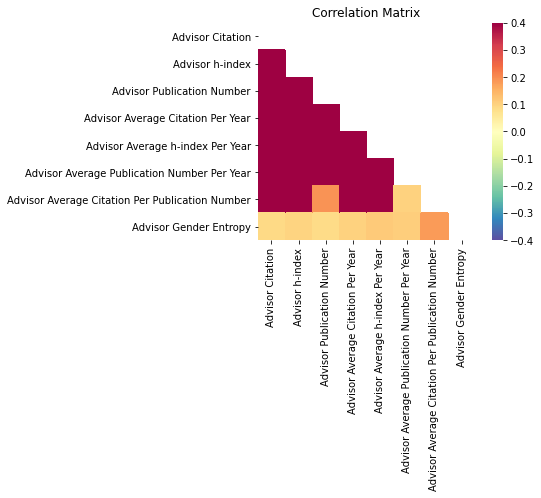

In [ ]:
sub_result3 = result[['Advisor Citation', 'Advisor h-index', 'Advisor Publication Number', 'Advisor Average Citation Per Year', 'Advisor Average h-index Per Year', 'Advisor Average Publication Number Per Year', 'Advisor Average Citation Per Publication Number', 'Advisor Gender Entropy']]

corrs = sub_result3.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

In [ ]:
corr2 = sub_result3.corr(method=spearmanr_pval)
corr2

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Gender Entropy
Advisor Citation,1.000000e+00,2.030125e-59,1.086735e-25,1.015174e-53,3.030740e-13,5.749537e-12,7.509979e-22,0.152279
Advisor h-index,2.030125e-59,1.000000e+00,2.671955e-34,5.417160e-36,5.316835e-16,4.995683e-16,2.111230e-12,0.460492
Advisor Publication Number,1.086735e-25,2.671955e-34,1.000000e+00,1.800535e-14,1.779811e-06,3.320336e-31,3.231381e-02,0.626133
Advisor Average Citation Per Year,1.015174e-53,5.417160e-36,1.800535e-14,1.000000e+00,5.867928e-26,1.049525e-12,3.850498e-28,0.079273
Advisor Average h-index Per Year,3.030740e-13,5.316835e-16,1.779811e-06,5.867928e-26,1.000000e+00,5.095910e-15,4.850271e-09,0.193200
Advisor Average Publication Number Per Year,5.749537e-12,4.995683e-16,3.320336e-31,1.049525e-12,5.095910e-15,1.000000e+00,6.051725e-01,0.472437
Advisor Average Citation Per Publication Number,7.509979e-22,2.111230e-12,3.231381e-02,3.850498e-28,4.850271e-09,6.051725e-01,1.000000e+00,0.049233
Advisor Gender Entropy,1.522790e-01,4.604917e-01,6.261329e-01,7.927284e-02,1.932000e-01,4.724370e-01,4.923318e-02,1.000000


In [ ]:
corr3 = sub_result3.corr(method=pearsonr_pval)
corr3

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Gender Entropy
Advisor Citation,1.000000e+00,1.041975e-38,2.327718e-19,2.033436e-46,5.599252e-13,4.290607e-11,4.837047e-18,0.339127
Advisor h-index,1.041975e-38,1.000000e+00,1.423736e-31,8.017406e-24,6.297632e-15,1.439397e-15,6.895592e-11,0.296063
Advisor Publication Number,2.327718e-19,1.423736e-31,1.000000e+00,2.984000e-11,3.923521e-06,9.824010e-28,3.874816e-02,0.365159
Advisor Average Citation Per Year,2.033436e-46,8.017406e-24,2.984000e-11,1.000000e+00,1.620143e-24,3.950890e-13,5.592341e-21,0.280123
Advisor Average h-index Per Year,5.599252e-13,6.297632e-15,3.923521e-06,1.620143e-24,1.000000e+00,1.887758e-18,3.475412e-08,0.226538
Advisor Average Publication Number Per Year,4.290607e-11,1.439397e-15,9.824010e-28,3.950890e-13,1.887758e-18,1.000000e+00,2.693704e-01,0.246087
Advisor Average Citation Per Publication Number,4.837047e-18,6.895592e-11,3.874816e-02,5.592341e-21,3.475412e-08,2.693704e-01,1.000000e+00,0.048986
Advisor Gender Entropy,3.391267e-01,2.960634e-01,3.651590e-01,2.801229e-01,2.265385e-01,2.460874e-01,4.898611e-02,1.000000


In [ ]:
corr4 = sub_result3.corr(method=kendall_pval)
corr4

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Gender Entropy
Advisor Citation,1.000000e+00,1.495558e-39,5.003766e-21,1.339545e-36,1.282509e-11,7.941782e-11,2.244707e-18,0.146337
Advisor h-index,1.495558e-39,1.000000e+00,1.691132e-26,7.836624e-28,9.679143e-14,2.087063e-14,1.345087e-11,0.448886
Advisor Publication Number,5.003766e-21,1.691132e-26,1.000000e+00,4.428982e-13,2.237058e-06,4.120362e-25,3.020853e-02,0.637178
Advisor Average Citation Per Year,1.339545e-36,7.836624e-28,4.428982e-13,1.000000e+00,4.181736e-21,2.023903e-11,5.098479e-23,0.086034
Advisor Average h-index Per Year,1.282509e-11,9.679143e-14,2.237058e-06,4.181736e-21,1.000000e+00,1.545880e-13,8.296967e-09,0.184281
Advisor Average Publication Number Per Year,7.941782e-11,2.087063e-14,4.120362e-25,2.023903e-11,1.545880e-13,1.000000e+00,5.496099e-01,0.482231
Advisor Average Citation Per Publication Number,2.244707e-18,1.345087e-11,3.020853e-02,5.098479e-23,8.296967e-09,5.496099e-01,1.000000e+00,0.059867
Advisor Gender Entropy,1.463367e-01,4.488856e-01,6.371782e-01,8.603381e-02,1.842811e-01,4.822307e-01,5.986746e-02,1.000000


# Diversity in Different Universities

In [ ]:
university_nationality_distribution = adviser_advisee.groupby(['University', 'Advisee Nationality']).size() / adviser_advisee.groupby('University').size()
# print(nationality_distribution)
universities_nationality_distribution = []
for idx, university in enumerate(universities.index):
  universities_nationality_distribution.append(pd.concat([university_nationality_distribution[university], advisee_nationality.index.to_series()], axis=1).fillna(0)[0].values)

universities_nationality_distribution = np.asarray(universities_nationality_distribution, dtype=np.float32)

In [ ]:
from scipy.stats import entropy

university_entropy = pd.Series(np.apply_along_axis(entropy, 1, universities_nationality_distribution), index =universities.index) 

university_entropy.sort_values(ascending=False)

University of Waterloo        2.779031
MIT                           2.728599
Carnegie Mellon University    2.655622
Caltech                       2.564994
Stanford University           2.519957
Cornell University            2.317272
dtype: float32

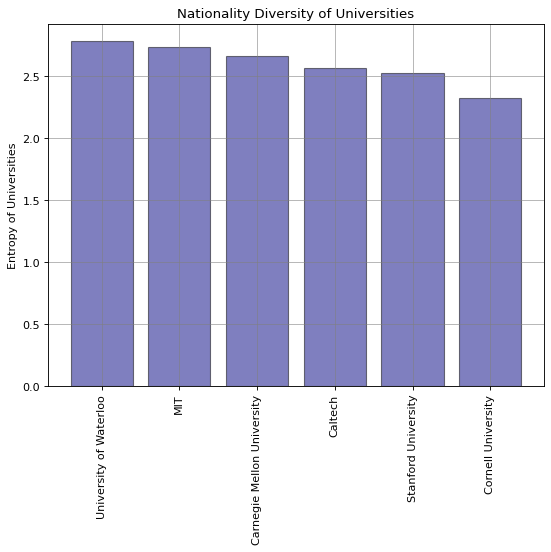

In [ ]:
universities_diversity = university_entropy.sort_values(ascending=False)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (universities_diversity.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(universities_diversity), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Entropy of Universities')
plt.title('Nationality Diversity of Universities')

plt.show()

In [ ]:
university_results = adviser_advisee.iloc[:, 0:3].groupby('University').nth(0)
university_results['Citation Avg'] = adviser_advisee.iloc[:, 0:23].groupby(['Advisor Website']).nth(0).groupby('University')['Advisor Citation'].sum()
university_results['h-index Avg'] = adviser_advisee.iloc[:, 0:23].groupby(['Advisor Website']).nth(0).groupby('University')['Advisor h-index'].sum()
university_results['Publication Number Avg'] = adviser_advisee.iloc[:, 0:23].groupby(['Advisor Website']).nth(0).groupby('University')['Advisor Publication Number'].sum()
university_results['Nationality Entropy'] = university_entropy
university_results

,World Field Ranking,North US Field Ranking,Citation Avg,h-index Avg,Publication Number Avg,Nationality Entropy
University,,,,,,
Caltech,29,16,383012,974,4768,2.564994
Carnegie Mellon University,3,3,534132,1134,3156,2.655622
Cornell University,19,11,332151,784,3575,2.317272
MIT,1,1,405645,948,4105,2.728599
Stanford University,2,2,717801,1460,6032,2.519957
University of Waterloo,24,13,102296,540,3089,2.779031


In [ ]:
university_results.corr(method=spearmanr_pval)

,World Field Ranking,North US Field Ranking,Citation Avg,h-index Avg,Publication Number Avg,Nationality Entropy
World Field Ranking,1.000000,0.000000,0.156175,0.468478,0.622787,0.957155
North US Field Ranking,0.000000,1.000000,0.156175,0.468478,0.622787,0.957155
Citation Avg,0.156175,0.156175,1.000000,0.004805,0.208000,0.622787
h-index Avg,0.468478,0.468478,0.004805,1.000000,0.156175,0.468478
Publication Number Avg,0.622787,0.622787,0.208000,0.156175,1.000000,0.265703
Nationality Entropy,0.957155,0.957155,0.622787,0.468478,0.265703,1.000000


#Simpson Paradox: Groupby University

In [ ]:
result.groupby('University')[['Advisor Citation','Advisor Nationality Entropy']].corr()

Advisor Citation  \
University                                                                 
Caltech                    Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.446101   
Carnegie Mellon University Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.534583   
Cornell University         Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.474219   
MIT                        Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.122172   
Stanford University        Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.465436   
University of Waterloo     Advisor Citation                     1.000000   
                           Advisor Nationality Entropy          0.207591   

                                                        Advisor Nationality Entropy  
University                                                                           
Caltech                    Advisor Citation                                0.446101  
                           Advisor Nationality Entropy                     1.000000  
Carnegie Mellon University Advisor Citation                                0.534583  
                           Advisor Nationality Entropy                     1.000000  
Cornell University         Advisor Citation                                0.474219  
                           Advisor Nationality Entropy                     1.000000  
MIT                        Advisor Citation                                0.122172  
                           Advisor Nationality Entropy                     1.000000  
Stanford University        Advisor Citation                                0.465436  
                           Advisor Nationality Entropy                     1.000000  
University of Waterloo     Advisor Citation                                0.207591  
                           Advisor Nationality Entropy                     1.000000

In [ ]:
result.groupby('University')[['Advisor Average Citation Per Year','Advisor Nationality Entropy']].corr()

Advisor Average Citation Per Year  \
University                                                                                        
Caltech                    Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.425947   
Carnegie Mellon University Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.564344   
Cornell University         Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.363679   
MIT                        Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.088420   
Stanford University        Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.470603   
University of Waterloo     Advisor Average Citation Per Year                           1.000000   
                           Advisor Nationality Entropy                                 0.061290   

                                                              Advisor Nationality Entropy  
University                                                                                 
Caltech                    Advisor Average Citation Per Year                     0.425947  
                           Advisor Nationality Entropy                           1.000000  
Carnegie Mellon University Advisor Average Citation Per Year                     0.564344  
                           Advisor Nationality Entropy                           1.000000  
Cornell University         Advisor Average Citation Per Year                     0.363679  
                           Advisor Nationality Entropy                           1.000000  
MIT                        Advisor Average Citation Per Year                     0.088420  
                           Advisor Nationality Entropy                           1.000000  
Stanford University        Advisor Average Citation Per Year                     0.470603  
                           Advisor Nationality Entropy                           1.000000  
University of Waterloo     Advisor Average Citation Per Year                     0.061290  
                           Advisor Nationality Entropy                           1.000000

In [ ]:
result.groupby('University')[['Advisor Average Citation Per Student','Advisor Nationality Entropy']].corr()

Advisor Average Citation Per Student  \
University                                                                                              
Caltech                    Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                       0.181370   
Carnegie Mellon University Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                       0.275164   
Cornell University         Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                       0.182164   
MIT                        Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                       0.029071   
Stanford University        Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                      -0.060533   
University of Waterloo     Advisor Average Citation Per Student                              1.000000   
                           Advisor Nationality Entropy                                      -0.080074   

                                                                 Advisor Nationality Entropy  
University                                                                                    
Caltech                    Advisor Average Citation Per Student                     0.181370  
                           Advisor Nationality Entropy                              1.000000  
Carnegie Mellon University Advisor Average Citation Per Student                     0.275164  
                           Advisor Nationality Entropy                              1.000000  
Cornell University         Advisor Average Citation Per Student                     0.182164  
                           Advisor Nationality Entropy                              1.000000  
MIT                        Advisor Average Citation Per Student                     0.029071  
                           Advisor Nationality Entropy                              1.000000  
Stanford University        Advisor Average Citation Per Student                    -0.060533  
                           Advisor Nationality Entropy                              1.000000  
University of Waterloo     Advisor Average Citation Per Student                    -0.080074  
                           Advisor Nationality Entropy                              1.000000

In [ ]:
result.groupby('University')[['Advisor h-index','Advisor Nationality Entropy']].corr()

Advisor h-index  \
University                                                                
Caltech                    Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.498631   
Carnegie Mellon University Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.695795   
Cornell University         Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.394588   
MIT                        Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.404150   
Stanford University        Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.351512   
University of Waterloo     Advisor h-index                     1.000000   
                           Advisor Nationality Entropy         0.519914   

                                                        Advisor Nationality Entropy  
University                                                                           
Caltech                    Advisor h-index                                 0.498631  
                           Advisor Nationality Entropy                     1.000000  
Carnegie Mellon University Advisor h-index                                 0.695795  
                           Advisor Nationality Entropy                     1.000000  
Cornell University         Advisor h-index                                 0.394588  
                           Advisor Nationality Entropy                     1.000000  
MIT                        Advisor h-index                                 0.404150  
                           Advisor Nationality Entropy                     1.000000  
Stanford University        Advisor h-index                                 0.351512  
                           Advisor Nationality Entropy                     1.000000  
University of Waterloo     Advisor h-index                                 0.519914  
                           Advisor Nationality Entropy                     1.000000

In [ ]:
result.groupby('University')[['Advisor Average h-index Per Year','Advisor Nationality Entropy']].corr()

Advisor Average h-index Per Year  \
University                                                                                      
Caltech                    Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                               0.088239   
Carnegie Mellon University Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                               0.403605   
Cornell University         Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                              -0.152732   
MIT                        Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                               0.209475   
Stanford University        Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                               0.417185   
University of Waterloo     Advisor Average h-index Per Year                          1.000000   
                           Advisor Nationality Entropy                              -0.298492   

                                                             Advisor Nationality Entropy  
University                                                                                
Caltech                    Advisor Average h-index Per Year                     0.088239  
                           Advisor Nationality Entropy                          1.000000  
Carnegie Mellon University Advisor Average h-index Per Year                     0.403605  
                           Advisor Nationality Entropy                          1.000000  
Cornell University         Advisor Average h-index Per Year                    -0.152732  
                           Advisor Nationality Entropy                          1.000000  
MIT                        Advisor Average h-index Per Year                     0.209475  
                           Advisor Nationality Entropy                          1.000000  
Stanford University        Advisor Average h-index Per Year                     0.417185  
                           Advisor Nationality Entropy                          1.000000  
University of Waterloo     Advisor Average h-index Per Year                    -0.298492  
                           Advisor Nationality Entropy                          1.000000

In [ ]:
result.groupby('University')[['Advisor Average h-index Per Student','Advisor Nationality Entropy']].corr()

Advisor Average h-index Per Student  \
University                                                                                            
Caltech                    Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.226383   
Carnegie Mellon University Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.047796   
Cornell University         Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.360443   
MIT                        Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.732690   
Stanford University        Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.474577   
University of Waterloo     Advisor Average h-index Per Student                             1.000000   
                           Advisor Nationality Entropy                                    -0.631886   

                                                                Advisor Nationality Entropy  
University                                                                                   
Caltech                    Advisor Average h-index Per Student                    -0.226383  
                           Advisor Nationality Entropy                             1.000000  
Carnegie Mellon University Advisor Average h-index Per Student                    -0.047796  
                           Advisor Nationality Entropy                             1.000000  
Cornell University         Advisor Average h-index Per Student                    -0.360443  
                           Advisor Nationality Entropy                             1.000000  
MIT                        Advisor Average h-index Per Student                    -0.732690  
                           Advisor Nationality Entropy                             1.000000  
Stanford University        Advisor Average h-index Per Student                    -0.474577  
                           Advisor Nationality Entropy                             1.000000  
University of Waterloo     Advisor Average h-index Per Student                    -0.631886  
                           Advisor Nationality Entropy                             1.000000

In [ ]:
result.groupby('University')[['Advisor Publication Number','Advisor Nationality Entropy']].corr()

Advisor Publication Number  \
University                                                                           
Caltech                    Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.344061   
Carnegie Mellon University Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.606125   
Cornell University         Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.283327   
MIT                        Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.481875   
Stanford University        Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.349367   
University of Waterloo     Advisor Publication Number                     1.000000   
                           Advisor Nationality Entropy                    0.624566   

                                                        Advisor Nationality Entropy  
University                                                                           
Caltech                    Advisor Publication Number                      0.344061  
                           Advisor Nationality Entropy                     1.000000  
Carnegie Mellon University Advisor Publication Number                      0.606125  
                           Advisor Nationality Entropy                     1.000000  
Cornell University         Advisor Publication Number                      0.283327  
                           Advisor Nationality Entropy                     1.000000  
MIT                        Advisor Publication Number                      0.481875  
                           Advisor Nationality Entropy                     1.000000  
Stanford University        Advisor Publication Number                      0.349367  
                           Advisor Nationality Entropy                     1.000000  
University of Waterloo     Advisor Publication Number                      0.624566  
                           Advisor Nationality Entropy                     1.000000

In [ ]:
result.groupby('University')[['Advisor Average Publication Number Per Year','Advisor Nationality Entropy']].corr()

Advisor Average Publication Number Per Year  \
University                                                                                                            
Caltech                    Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                     0.118400   
Carnegie Mellon University Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                     0.535410   
Cornell University         Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                    -0.154448   
MIT                        Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                     0.464785   
Stanford University        Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                     0.544581   
University of Waterloo     Advisor Average Publication Number Per Year                                     1.000000   
                           Advisor Nationality Entropy                                                     0.512765   

                                                                        Advisor Nationality Entropy  
University                                                                                           
Caltech                    Advisor Average Publication Number Per Year                     0.118400  
                           Advisor Nationality Entropy                                     1.000000  
Carnegie Mellon University Advisor Average Publication Number Per Year                     0.535410  
                           Advisor Nationality Entropy                                     1.000000  
Cornell University         Advisor Average Publication Number Per Year                    -0.154448  
                           Advisor Nationality Entropy                                     1.000000  
MIT                        Advisor Average Publication Number Per Year                     0.464785  
                           Advisor Nationality Entropy                                     1.000000  
Stanford University        Advisor Average Publication Number Per Year                     0.544581  
                           Advisor Nationality Entropy                                     1.000000  
University of Waterloo     Advisor Average Publication Number Per Year                     0.512765  
                           Advisor Nationality Entropy                                     1.000000

In [ ]:
result.groupby('University')[['Advisor Average Publication Number Per Student','Advisor Nationality Entropy']].corr()

Advisor Average Publication Number Per Student  \
University                                                                                                                  
Caltech                    Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                          -0.034866   
Carnegie Mellon University Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                           0.177008   
Cornell University         Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                          -0.378956   
MIT                        Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                          -0.270397   
Stanford University        Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                          -0.351399   
University of Waterloo     Advisor Average Publication Number Per Student                                        1.000000   
                           Advisor Nationality Entropy                                                           0.160762   

                                                                           Advisor Nationality Entropy  
University                                                                                              
Caltech                    Advisor Average Publication Number Per Student                    -0.034866  
                           Advisor Nationality Entropy                                        1.000000  
Carnegie Mellon University Advisor Average Publication Number Per Student                     0.177008  
                           Advisor Nationality Entropy                                        1.000000  
Cornell University         Advisor Average Publication Number Per Student                    -0.378956  
                           Advisor Nationality Entropy                                        1.000000  
MIT                        Advisor Average Publication Number Per Student                    -0.270397  
                           Advisor Nationality Entropy                                        1.000000  
Stanford University        Advisor Average Publication Number Per Student                    -0.351399  
                           Advisor Nationality Entropy                                        1.000000  
University of Waterloo     Advisor Average Publication Number Per Student                     0.160762  
                           Advisor Nationality Entropy                                        1.000000

# Simpson Paradox: Groupby Field

In [ ]:
subfields = ['AI', 'Communication & Security', 'Computer Architecture & Operating Systems', 'Computer Graphics', 'Parallel & Distributed Computing', 'Databases & Information Management', 'Scientific Computing', 'Software, Languages & Compilers', 'Hardware', 'Theoretical CS', 'HCI']

pat = ''
for field in subfields:
  pat += '('
  pat += field
  pat += ')?'
print(pat)
s = result['Advisor CS Subfield'].str.extractall(pat)
s.dropna(axis = 0, how = 'all', inplace = True)
s = s[s!=np.NaN].stack()
s.map(dict(zip(range(len(subfields)), subfields)))

df1 = s.to_frame().reset_index()
df1.columns
df1 = df1.drop('match', axis=1)
df1 = df1.drop('level_2', axis=1)
df1 = df1.rename(columns = {'level_0':'Advisor Index', 0:'Subfields'})
df1 = pd.merge(result, df1, left_index=True, right_on='Advisor Index')
df1.head()


(AI)?(Communication & Security)?(Computer Architecture & Operating Systems)?(Computer Graphics)?(Parallel & Distributed Computing)?(Databases & Information Management)?(Scientific Computing)?(Software, Languages & Compilers)?(Hardware)?(Theoretical CS)?(HCI)?


,University,World Field Ranking,North US Field Ranking,Department,Advisor Role,Advisor Name,Advisor Field,Advisor CS Subfield,Advisor Nationality,Advisor Gender,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor First Paper Year,Advisor Research Years,Advisor Average Citation Per Year,Advisor Average h-index Per Year,Advisor Average Publication Number Per Year,Advisor Average Citation Per Publication Number,Advisor Average Citation Per Student,Advisor Average h-index Per Student,Advisor Average Publication Number Per Student,Advisor Website,Nationality Proportion,Gender Proportion,Diversity,Advisor Nationality Entropy,Advisor Gender Entropy,Advisor Index,Subfields
0,Carnegie Mellon University,3,3,CS,Professor,Takeo Kanade,"Computer Vision,Multi-Media Technology,Robotics",AI-Computer Graphics,Japan,M,178786,171,690,1971,50,3575.720000,3.420000,13.800000,259.110145,6876.384615,6.576923,26.538462,https://www.ri.cmu.edu/ri-faculty/takeo-kanade/,0.000000,0.923077,0.384615,2.031332,0.271189,0,AI
1,Carnegie Mellon University,3,3,CS,Professor,Takeo Kanade,"Computer Vision,Multi-Media Technology,Robotics",AI-Computer Graphics,Japan,M,178786,171,690,1971,50,3575.720000,3.420000,13.800000,259.110145,6876.384615,6.576923,26.538462,https://www.ri.cmu.edu/ri-faculty/takeo-kanade/,0.000000,0.923077,0.384615,2.031332,0.271189,0,Computer Graphics
2,MIT,1,1,EECS,Professor,Hari Balakrishnan,"Networks,Mobile Systems",Communication & Security,India,M,134674,122,473,1995,26,5179.769231,4.692308,18.192308,284.723044,4643.931034,4.206897,16.310345,http://nms.csail.mit.edu/~hari/,0.310345,0.724138,0.310345,1.662203,0.589003,1,Communication & Security
3,Cornell University,19,11,CS,Professor,Deborah Estrin,"digital health,mobile sensing,Internet archite...",Communication & Security-Computer Architecture...,Usa,F,129279,131,787,1981,40,3231.975000,3.275000,19.675000,164.268107,2486.134615,2.519231,15.134615,https://destrin.tech.cornell.edu/,0.269231,0.230769,0.346154,2.380569,0.540204,2,Communication & Security
4,Cornell University,19,11,CS,Professor,Deborah Estrin,"digital health,mobile sensing,Internet archite...",Communication & Security-Computer Architecture...,Usa,F,129279,131,787,1981,40,3231.975000,3.275000,19.675000,164.268107,2486.134615,2.519231,15.134615,https://destrin.tech.cornell.edu/,0.269231,0.230769,0.346154,2.380569,0.540204,2,Computer Architecture & Operating Systems


In [ ]:
df1.groupby('Subfields')[['Advisor Citation','Advisor Nationality Entropy']].corr()

Advisor Citation  \
Subfields                                                                                 
AI                                        Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.371439   
Communication & Security                  Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.512877   
Computer Architecture & Operating Systems Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.743358   
Computer Graphics                         Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.152988   
Databases & Information Management        Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.385984   
HCI                                       Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.633418   
Hardware                                  Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy         -0.031945   
Parallel & Distributed Computing          Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.615922   
Scientific Computing                      Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.283960   
Software, Languages & Compilers           Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.386667   
Theoretical CS                            Advisor Citation                     1.000000   
                                          Advisor Nationality Entropy          0.298435   

                                                                       Advisor Nationality Entropy  
Subfields                                                                                           
AI                                        Advisor Citation                                0.371439  
                                          Advisor Nationality Entropy                     1.000000  
Communication & Security                  Advisor Citation                                0.512877  
                                          Advisor Nationality Entropy                     1.000000  
Computer Architecture & Operating Systems Advisor Citation                                0.743358  
                                          Advisor Nationality Entropy                     1.000000  
Computer Graphics                         Advisor Citation                                0.152988  
                                          Advisor Nationality Entropy                     1.000000  
Databases & Information Management        Advisor Citation                                0.385984  
                                          Advisor Nationality Entropy                     1.000000  
HCI                                       Advisor Citation                                0.633418  
                                          Advisor Nationality Entropy                     1.000000  
Hardware                                  Advisor Citation                               -0.031945  
                                          Advisor Nationality Entropy                     1.000000  
Parallel & Distributed Computing          Advisor Citation                                0.615922  
                                          Advisor Nationality Entropy                     1.000000  
Scientific Computing                      Advisor Citation          

In [ ]:
df1.groupby('Subfields')[['Advisor Citation','Advisor Gender Entropy']].corr()

Advisor Citation  \
Subfields                                                                            
AI                                        Advisor Citation                1.000000   
                                          Advisor Gender Entropy         -0.112334   
Communication & Security                  Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.193773   
Computer Architecture & Operating Systems Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.127541   
Computer Graphics                         Advisor Citation                1.000000   
                                          Advisor Gender Entropy         -0.221954   
Databases & Information Management        Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.751726   
HCI                                       Advisor Citation                1.000000   
                                          Advisor Gender Entropy         -0.109263   
Hardware                                  Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.216924   
Parallel & Distributed Computing          Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.027832   
Scientific Computing                      Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.145726   
Software, Languages & Compilers           Advisor Citation                1.000000   
                                          Advisor Gender Entropy         -0.060769   
Theoretical CS                            Advisor Citation                1.000000   
                                          Advisor Gender Entropy          0.420806   

                                                                  Advisor Gender Entropy  
Subfields                                                                                 
AI                                        Advisor Citation                     -0.112334  
                                          Advisor Gender Entropy                1.000000  
Communication & Security                  Advisor Citation                      0.193773  
                                          Advisor Gender Entropy                1.000000  
Computer Architecture & Operating Systems Advisor Citation                      0.127541  
                                          Advisor Gender Entropy                1.000000  
Computer Graphics                         Advisor Citation                     -0.221954  
                                          Advisor Gender Entropy                1.000000  
Databases & Information Management        Advisor Citation                      0.751726  
                                          Advisor Gender Entropy                1.000000  
HCI                                       Advisor Citation                     -0.109263  
                                          Advisor Gender Entropy                1.000000  
Hardware                                  Advisor Citation                      0.216924  
                                          Advisor Gender Entropy                1.000000  
Parallel & Distributed Computing          Advisor Citation                      0.027832  
                                          Advisor Gender Entropy                1.000000  
Scientific Computing                      Advisor Citation                      0.145726  
                                          Advisor Gender Entropy                1.000000  
Software, Languages & Compilers           Advisor Citation                     -0.060769  
                                          Advisor Gender Entropy                1.000000  

In [ ]:
df1.groupby('Subfields')[['Advisor Average Citation Per Year','Advisor Nationality Entropy']].corr()

Advisor Average Citation Per Year  \
Subfields                                                                                                        
AI                                        Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.327689   
Communication & Security                  Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.407113   
Computer Architecture & Operating Systems Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.760220   
Computer Graphics                         Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.199323   
Databases & Information Management        Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.327378   
HCI                                       Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.577984   
Hardware                                  Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                -0.020462   
Parallel & Distributed Computing          Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.628216   
Scientific Computing                      Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.230542   
Software, Languages & Compilers           Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.347039   
Theoretical CS                            Advisor Average Citation Per Year                           1.000000   
                                          Advisor Nationality Entropy                                 0.275180   

                                                                             Advisor Nationality Entropy  
Subfields                                                                                                 
AI                                        Advisor Average Citation Per Year                     0.327689  
                                          Advisor Nationality Entropy                           1.000000  
Communication & Security                  Advisor Average Citation Per Year                     0.407113  
                                          Advisor Nationality Entropy                           1.000000  
Computer Architecture & Operating Systems Advisor Average Citation Per Year                     0.760220  
                                          Advisor Nationality Entropy                           1.000000  
Computer Graphics                         Advisor Average Citation Per Year                     0.199323  
                                          Advisor Nationality Entropy                           1.000000  
Databases & Information Management        Advisor Average Citation Per Year                     0.327378  
                                          Advisor Nationality Entropy                           1.000000  
HCI                                       Advisor Averag

In [ ]:
df1.groupby('Subfields')[['Advisor Average Citation Per Student','Advisor Nationality Entropy']].corr()

Advisor Average Citation Per Student  \
Subfields                                                                                                              
AI                                        Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.151612   
Communication & Security                  Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.307407   
Computer Architecture & Operating Systems Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.138932   
Computer Graphics                         Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.114037   
Databases & Information Management        Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.376001   
HCI                                       Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.666721   
Hardware                                  Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                      -0.075169   
Parallel & Distributed Computing          Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.374325   
Scientific Computing                      Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.052506   
Software, Languages & Compilers           Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                      -0.433344   
Theoretical CS                            Advisor Average Citation Per Student                              1.000000   
                                          Advisor Nationality Entropy                                       0.072577   

                                                                                Advisor Nationality Entropy  
Subfields                                                                                                    
AI                                        Advisor Average Citation Per Student                     0.151612  
                                          Advisor Nationality Entropy                              1.000000  
Communication & Security                  Advisor Average Citation Per Student                     0.307407  
                                          Advisor Nationality Entropy                              1.000000  
Computer Architecture & Operating Systems Advisor Average Citation Per Student                     0.138932  
                                          Advisor Nationality Entropy                              1.000000  
Computer Graphics                         Advisor Average Citation Per Student                     0.114037  
                                          Advisor Nationality Entropy                              1.000000  
Databases & Information Management        Advisor Average Citation Per Student                     

In [ ]:
df1.groupby('Subfields')[['Advisor h-index','Advisor Nationality Entropy']].corr()

Advisor h-index  \
Subfields                                                                                
AI                                        Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.511548   
Communication & Security                  Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.668855   
Computer Architecture & Operating Systems Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.728451   
Computer Graphics                         Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.162059   
Databases & Information Management        Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.615647   
HCI                                       Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.550255   
Hardware                                  Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.082476   
Parallel & Distributed Computing          Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.660992   
Scientific Computing                      Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.307890   
Software, Languages & Compilers           Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.245321   
Theoretical CS                            Advisor h-index                     1.000000   
                                          Advisor Nationality Entropy         0.333378   

                                                                       Advisor Nationality Entropy  
Subfields                                                                                           
AI                                        Advisor h-index                                 0.511548  
                                          Advisor Nationality Entropy                     1.000000  
Communication & Security                  Advisor h-index                                 0.668855  
                                          Advisor Nationality Entropy                     1.000000  
Computer Architecture & Operating Systems Advisor h-index                                 0.728451  
                                          Advisor Nationality Entropy                     1.000000  
Computer Graphics                         Advisor h-index                                 0.162059  
                                          Advisor Nationality Entropy                     1.000000  
Databases & Information Management        Advisor h-index                                 0.615647  
                                          Advisor Nationality Entropy                     1.000000  
HCI                                       Advisor h-index                                 0.550255  
                                          Advisor Nationality Entropy                     1.000000  
Hardware                                  Advisor h-index                                 0.082476  
                                          Advisor Nationality Entropy                     1.000000  
Parallel & Distributed Computing          Advisor h-index                                 0.660992  
                                          Advisor Nationality Entropy                     1.000000  
Scientific Computing                      Advisor h-index                                 0.

In [ ]:
df1.groupby('Subfields')[['Advisor Average h-index Per Year','Advisor Nationality Entropy']].corr()

Advisor Average h-index Per Year  \
Subfields                                                                                                      
AI                                        Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.166584   
Communication & Security                  Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.430766   
Computer Architecture & Operating Systems Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.752907   
Computer Graphics                         Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.244003   
Databases & Information Management        Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.321163   
HCI                                       Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.204111   
Hardware                                  Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.136453   
Parallel & Distributed Computing          Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.581847   
Scientific Computing                      Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.126335   
Software, Languages & Compilers           Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.144775   
Theoretical CS                            Advisor Average h-index Per Year                          1.000000   
                                          Advisor Nationality Entropy                               0.008659   

                                                                            Advisor Nationality Entropy  
Subfields                                                                                                
AI                                        Advisor Average h-index Per Year                     0.166584  
                                          Advisor Nationality Entropy                          1.000000  
Communication & Security                  Advisor Average h-index Per Year                     0.430766  
                                          Advisor Nationality Entropy                          1.000000  
Computer Architecture & Operating Systems Advisor Average h-index Per Year                     0.752907  
                                          Advisor Nationality Entropy                          1.000000  
Computer Graphics                         Advisor Average h-index Per Year                     0.244003  
                                          Advisor Nationality Entropy                          1.000000  
Databases & Information Management        Advisor Average h-index Per Year                     0.321163  
                                          Advisor Nationality Entropy                          1.000000  
HCI                                       Advisor Average h-index Per Year                     0.204111  
         

In [ ]:
df1.groupby('Subfields')[['Advisor Average h-index Per Student','Advisor Nationality Entropy']].corr()

Advisor Average h-index Per Student  \
Subfields                                                                                                            
AI                                        Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.437294   
Communication & Security                  Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.222679   
Computer Architecture & Operating Systems Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.204997   
Computer Graphics                         Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.059292   
Databases & Information Management        Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                     0.545464   
HCI                                       Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                     0.288603   
Hardware                                  Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.001316   
Parallel & Distributed Computing          Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.071540   
Scientific Computing                      Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.258449   
Software, Languages & Compilers           Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.599925   
Theoretical CS                            Advisor Average h-index Per Student                             1.000000   
                                          Advisor Nationality Entropy                                    -0.526266   

                                                                               Advisor Nationality Entropy  
Subfields                                                                                                   
AI                                        Advisor Average h-index Per Student                    -0.437294  
                                          Advisor Nationality Entropy                             1.000000  
Communication & Security                  Advisor Average h-index Per Student                    -0.222679  
                                          Advisor Nationality Entropy                             1.000000  
Computer Architecture & Operating Systems Advisor Average h-index Per Student                    -0.204997  
                                          Advisor Nationality Entropy                             1.000000  
Computer Graphics                         Advisor Average h-index Per Student                    -0.059292  
                                          Advisor Nationality Entropy                             1.000000  
Databases & Information Management        Advisor Average h-index Per Student                     0.545464  
                                          Advis

In [ ]:
df1.groupby('Subfields')[['Advisor Publication Number','Advisor Nationality Entropy']].corr()

Advisor Publication Number  \
Subfields                                                                                           
AI                                        Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.430162   
Communication & Security                  Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.685124   
Computer Architecture & Operating Systems Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.718309   
Computer Graphics                         Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.211693   
Databases & Information Management        Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.486742   
HCI                                       Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.747886   
Hardware                                  Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.270054   
Parallel & Distributed Computing          Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.512166   
Scientific Computing                      Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.067978   
Software, Languages & Compilers           Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.148313   
Theoretical CS                            Advisor Publication Number                     1.000000   
                                          Advisor Nationality Entropy                    0.481777   

                                                                       Advisor Nationality Entropy  
Subfields                                                                                           
AI                                        Advisor Publication Number                      0.430162  
                                          Advisor Nationality Entropy                     1.000000  
Communication & Security                  Advisor Publication Number                      0.685124  
                                          Advisor Nationality Entropy                     1.000000  
Computer Architecture & Operating Systems Advisor Publication Number                      0.718309  
                                          Advisor Nationality Entropy                     1.000000  
Computer Graphics                         Advisor Publication Number                      0.211693  
                                          Advisor Nationality Entropy                     1.000000  
Databases & Information Management        Advisor Publication Number                      0.486742  
                                          Advisor Nationality Entropy                     1.000000  
HCI                                       Advisor Publication Number                      0.747886  
                                          Advisor Nationality Entropy                     1.000000  
Hardware                                  Advisor Publication Number                      0.270054  
                                          Advisor Nationality Entropy                     1.000000  
Parallel & Distributed Computi

In [ ]:
df1.groupby('Subfields')[['Advisor Average Publication Number Per Year','Advisor Nationality Entropy']].corr()

Advisor Average Publication Number Per Year  \
Subfields                                                                                                                            
AI                                        Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.175708   
Communication & Security                  Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.663073   
Computer Architecture & Operating Systems Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.780400   
Computer Graphics                         Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.340122   
Databases & Information Management        Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.425735   
HCI                                       Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.666041   
Hardware                                  Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.453414   
Parallel & Distributed Computing          Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.600284   
Scientific Computing                      Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                    -0.082206   
Software, Languages & Compilers           Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.107508   
Theoretical CS                            Advisor Average Publication Number Per Year                                     1.000000   
                                          Advisor Nationality Entropy                                                     0.414801   

                                                                                       Advisor Nationality Entropy  
Subfields                                                                                                           
AI                                        Advisor Average Publication Number Per Year                     0.175708  
                                          Advisor Nationality Entropy                                     1.000000  
Communication & Security                  Advisor Average Publication Number Per Year                     0.663073  
                                          Advisor Nationality Entropy                                     1.000000  
Computer Architecture & Operating Systems Advisor Average Publication Number Per Year                     0.780400  
                                          Advisor N

In [ ]:
df1.groupby('Subfields')[['Advisor Average Publication Number Per Student','Advisor Nationality Entropy']].corr()

Advisor Average Publication Number Per Student  \
Subfields                                                                                                                                  
AI                                        Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                          -0.316669   
Communication & Security                  Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.439683   
Computer Architecture & Operating Systems Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.033812   
Computer Graphics                         Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.086407   
Databases & Information Management        Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.493116   
HCI                                       Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.772173   
Hardware                                  Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.162376   
Parallel & Distributed Computing          Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                           0.014186   
Scientific Computing                      Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                          -0.241873   
Software, Languages & Compilers           Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                          -0.687318   
Theoretical CS                            Advisor Average Publication Number Per Student                                        1.000000   
                                          Advisor Nationality Entropy                                                          -0.229755   

                                                                                          Advisor Nationality Entropy  
Subfields                                                                                                              
AI                                        Advisor Average Publication Number Per Student                    -0.316669  
                                          Advisor Nationality Entropy                                        1.000000  
Communication & Security                  Advisor Average Publication Number Per Student                     0.439683  
                                          Advisor Nationality Entropy                                        1.000000  
Computer 

# Field Evaluation

In [ ]:
df1.groupby('Subfields').size().sort_values(ascending=False)

Subfields
AI                                           47
Theoretical CS                               28
Scientific Computing                         28
Communication & Security                     21
Software, Languages & Compilers              16
Computer Architecture & Operating Systems    15
Parallel & Distributed Computing             14
Computer Graphics                            14
Hardware                                      6
HCI                                           5
Databases & Information Management            4
dtype: int64

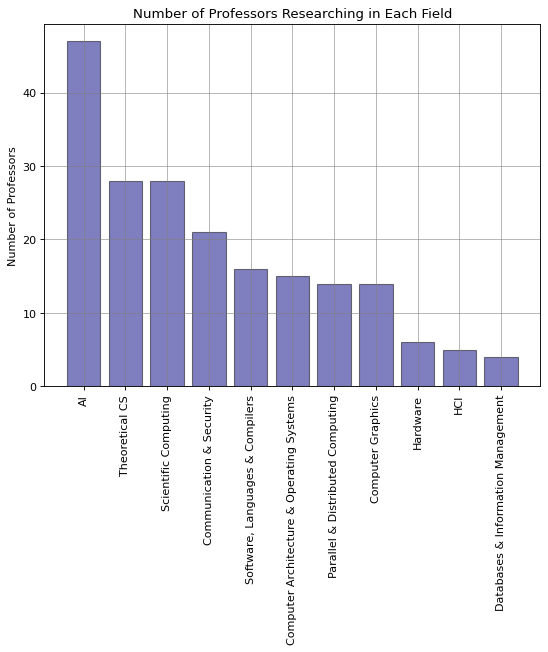

In [ ]:
fields_participation = df1.groupby('Subfields').size().sort_values(ascending=False)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (fields_participation.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(fields_participation), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Number of Professors')
plt.title('Number of Professors Researching in Each Field')

plt.show()

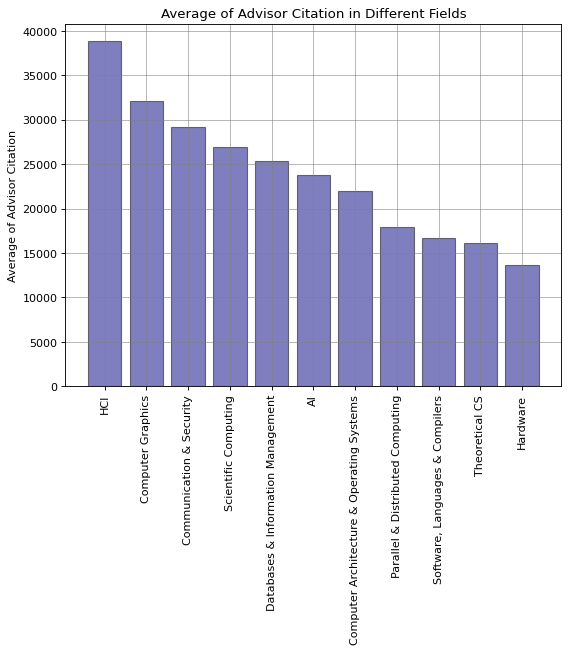

In [ ]:
subfield_avg_citation = (df1.groupby('Subfields').sum()['Advisor Citation'] / df1.groupby('Subfields').size())

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (subfield_avg_citation.sort_values(ascending=False).index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(subfield_avg_citation.sort_values(ascending=False)), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Average of Advisor Citation')
plt.title('Average of Advisor Citation in Different Fields')

plt.show()

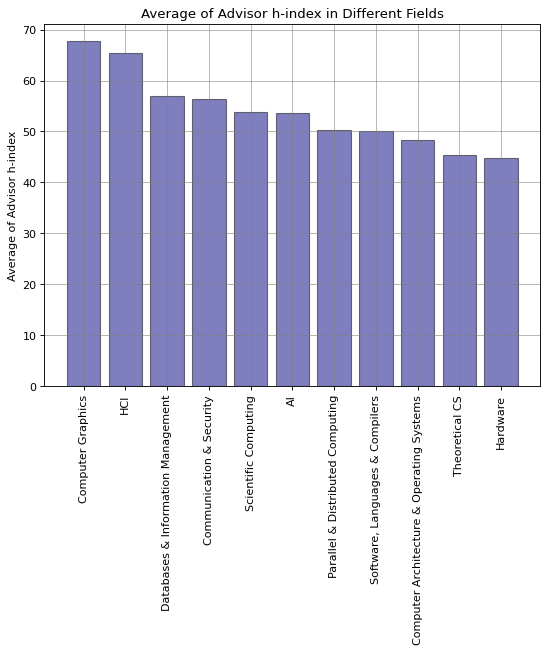

In [ ]:
subfield_avg_hindex = (df1.groupby('Subfields').sum()['Advisor h-index'] / df1.groupby('Subfields').size())

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (subfield_avg_hindex.sort_values(ascending=False).index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(subfield_avg_hindex.sort_values(ascending=False)), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Average of Advisor h-index')
plt.title('Average of Advisor h-index in Different Fields')

plt.show()

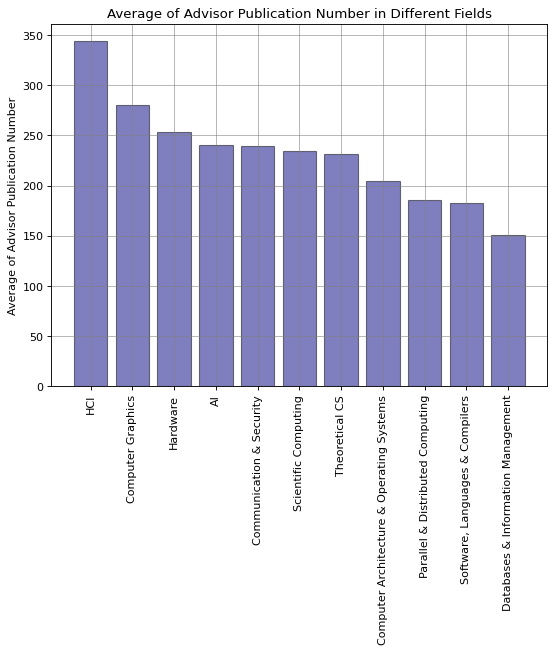

In [ ]:
subfield_avg_publication_number = (df1.groupby('Subfields').sum()['Advisor Publication Number'] / df1.groupby('Subfields').size())

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (subfield_avg_publication_number.sort_values(ascending=False).index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(subfield_avg_publication_number.sort_values(ascending=False)), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Average of Advisor Publication Number')
plt.title('Average of Advisor Publication Number in Different Fields')

plt.show()

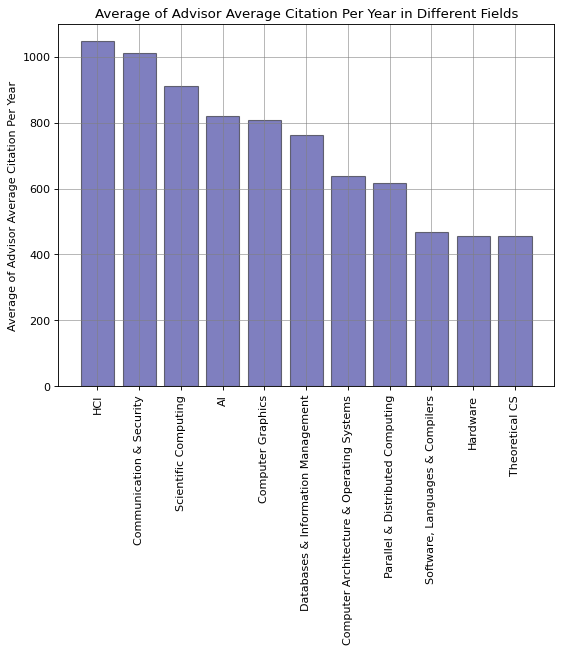

In [ ]:
subfield_avg_cite_per_year = (df1.groupby('Subfields').sum()['Advisor Average Citation Per Year'] / df1.groupby('Subfields').size())

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (subfield_avg_cite_per_year.sort_values(ascending=False).index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(subfield_avg_cite_per_year.sort_values(ascending=False)), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Average of Advisor Average Citation Per Year')
plt.title('Average of Advisor Average Citation Per Year in Different Fields')

plt.show()

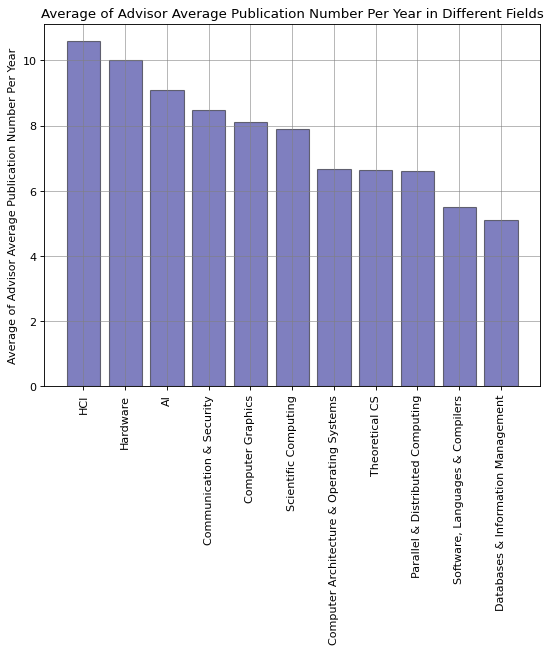

In [ ]:
subfield_avg_publication_number_per_year = (df1.groupby('Subfields').sum()['Advisor Average Publication Number Per Year'] / df1.groupby('Subfields').size())

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (subfield_avg_publication_number_per_year.sort_values(ascending=False).index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(subfield_avg_publication_number_per_year.sort_values(ascending=False)), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Average of Advisor Average Publication Number Per Year')
plt.title('Average of Advisor Average Publication Number Per Year in Different Fields')

plt.show()

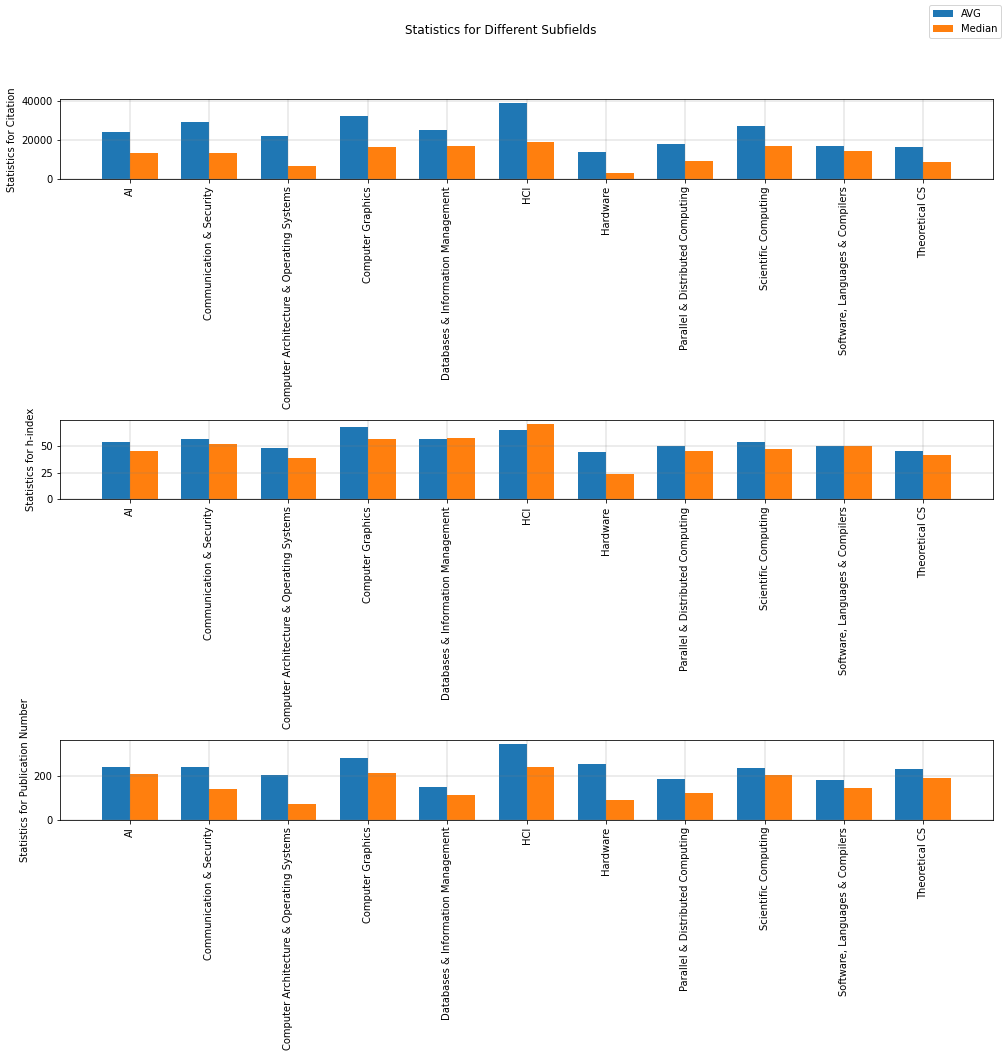

In [ ]:
cite_avg = subfield_avg_citation
cite_median = df1.groupby('Subfields').median()['Advisor Citation']
labels = subfield_avg_citation.index

x = np.arange(len(subfields))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(3, figsize=(14, 15))
ax[0].grid(True, linewidth=0.3, color='gray', linestyle='-')


rects1 = ax[0].bar(x - width/2, cite_avg, width, label='AVG')
rects2 = ax[0].bar(x + width/2, cite_median, width, label='Median')

ax[0].set_ylabel('Statistics for Citation')
fig.suptitle('Statistics for Different Subfields')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, rotation=90)




hindex_avg = subfield_avg_hindex
hindex_median = df1.groupby('Subfields').median()['Advisor h-index']
labels = subfield_avg_hindex.index

x = np.arange(len(subfields))  # the label locations
width = 0.35  # the width of the bars

ax[1].grid(True, linewidth=0.3, color='gray', linestyle='-')


rects1 = ax[1].bar(x - width/2, hindex_avg, width, label='AVG')
rects2 = ax[1].bar(x + width/2, hindex_median, width, label='Median')

ax[1].set_ylabel('Statistics for h-index')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, rotation=90)


pub_num_avg = subfield_avg_publication_number
pub_num_median = df1.groupby('Subfields').median()['Advisor Publication Number']
labels = subfield_avg_publication_number.index

x = np.arange(len(subfields))  # the label locations
width = 0.35  # the width of the bars

ax[2].grid(True, linewidth=0.3, color='gray', linestyle='-')


rects1 = ax[2].bar(x - width/2, pub_num_avg, width, label='AVG')
rects2 = ax[2].bar(x + width/2, pub_num_median, width, label='Median')

ax[2].set_ylabel('Statistics for Publication Number')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels, rotation=90)

# citation_avg_per_year_avg = subfield_avg_cite_per_year
# citation_avg_per_year_median = df1.groupby('Subfields').median()['Advisor Average Citation Per Year']
# labels = citation_avg_per_year_median.index

# x = np.arange(len(subfields))  # the label locations
# width = 0.35  # the width of the bars

# ax[3].grid(True, linewidth=0.3, color='gray', linestyle='-')


# rects1 = ax[3].bar(x - width/2, citation_avg_per_year_avg, width, label='AVG')
# rects2 = ax[3].bar(x + width/2, citation_avg_per_year_median, width, label='Median')

# ax[3].set_ylabel('Statistics for Citation Per Year')
# ax[3].set_xticks(x)
# ax[3].set_xticklabels(labels, rotation=90)

fig.suptitle('Statistics for Different Subfields')
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout(rect=[0, 0.02, 1, 0.92])


# Better to be focused or interdisciplinary?

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Citation'].astype('float64'))

0.17619818329152723

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average Citation Per Year'].astype('float64'))

0.09396376347162391

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average Citation Per Student'].astype('float64'))

0.11396701678097591

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor h-index'].astype('float64'))

0.24337241367677737

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average h-index Per Year'].astype('float64'))

0.0010172276866890274

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average h-index Per Student'].astype('float64'))

0.03411419578053436

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Publication Number'].astype('float64'))

0.286806571201632

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average Publication Number Per Year'].astype('float64'))

0.1447454079412958

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average Publication Number Per Student'].astype('float64'))

0.13158589992036732

In [ ]:
df1.groupby('Advisor Website').size().astype('float64').corr(df1.groupby('Advisor Website').nth(0)['Advisor Average Citation Per Publication Number'].astype('float64'))

0.027227964228088736

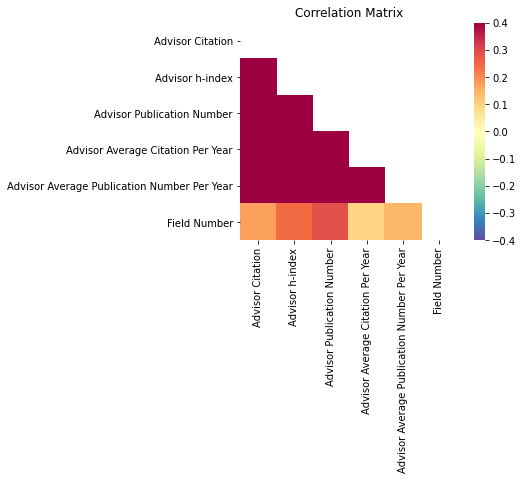

In [ ]:
sub_result4 = result[['Advisor Website', 'Advisor Citation', 'Advisor h-index', 'Advisor Publication Number', 'Advisor Average Citation Per Year', 'Advisor Average Publication Number Per Year']]
sub_result4 = pd.merge(sub_result4, df1.groupby('Advisor Website').size().rename('Field Number'), on='Advisor Website')
sub_result4.drop('Advisor Website', axis=1, inplace=True)

corrs = sub_result4.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

In [ ]:
corr2 = sub_result4.corr(method=spearmanr_pval)
corr2

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average Publication Number Per Year,Field Number
Advisor Citation,1.000000e+00,1.385767e-58,2.409027e-25,2.251671e-53,6.077073e-12,0.021696
Advisor h-index,1.385767e-58,1.000000e+00,6.247977e-34,1.476714e-35,5.311103e-16,0.018239
Advisor Publication Number,2.409027e-25,6.247977e-34,1.000000e+00,2.683749e-14,4.634805e-31,0.020737
Advisor Average Citation Per Year,2.251671e-53,1.476714e-35,2.683749e-14,1.000000e+00,1.017363e-12,0.123547
Advisor Average Publication Number Per Year,6.077073e-12,5.311103e-16,4.634805e-31,1.017363e-12,1.000000e+00,0.158934
Field Number,2.169604e-02,1.823920e-02,2.073659e-02,1.235467e-01,1.589341e-01,1.000000


In [ ]:
corr3 = sub_result4.corr(method=pearsonr_pval)
corr3

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average Publication Number Per Year,Field Number
Advisor Citation,1.000000e+00,2.583657e-38,3.948727e-19,5.901187e-46,5.556646e-11,0.058492
Advisor h-index,2.583657e-38,1.000000e+00,3.267851e-31,1.483771e-23,1.983560e-15,0.008475
Advisor Publication Number,3.948727e-19,3.267851e-31,1.000000e+00,4.192214e-11,1.682421e-27,0.001800
Advisor Average Citation Per Year,5.901187e-46,1.483771e-23,4.192214e-11,1.000000e+00,5.325760e-13,0.315724
Advisor Average Publication Number Per Year,5.556646e-11,1.983560e-15,1.682421e-27,5.325760e-13,1.000000e+00,0.121082
Field Number,5.849212e-02,8.475404e-03,1.799945e-03,3.157245e-01,1.210818e-01,1.000000


In [ ]:
corr4 = sub_result4.corr(method=kendall_pval)
corr4

,Advisor Citation,Advisor h-index,Advisor Publication Number,Advisor Average Citation Per Year,Advisor Average Publication Number Per Year,Field Number
Advisor Citation,1.000000e+00,4.764100e-39,8.831859e-21,2.429323e-36,8.306969e-11,0.022817
Advisor h-index,4.764100e-39,1.000000e+00,2.996465e-26,1.503811e-27,2.274238e-14,0.017778
Advisor Publication Number,8.831859e-21,2.996465e-26,1.000000e+00,5.951037e-13,5.839364e-25,0.019966
Advisor Average Citation Per Year,2.429323e-36,1.503811e-27,5.951037e-13,1.000000e+00,2.082230e-11,0.134543
Advisor Average Publication Number Per Year,8.306969e-11,2.274238e-14,5.839364e-25,2.082230e-11,1.000000e+00,0.155757
Field Number,2.281737e-02,1.777801e-02,1.996554e-02,1.345425e-01,1.557566e-01,1.000000


#Number of Different Nationalities and Gender in Different Fields:

#### For Advisee:

In [ ]:
advisee_subfield = pd.merge(df1, adviser_advisee.iloc[:, 21:], on='Advisor Website')
advisee_subfield.groupby(['Subfields', 'Advisee Nationality'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)

,Subfields,Advisee Nationality,size
409,Theoretical CS,China,117
450,Theoretical CS,Usa,98
418,Theoretical CS,India,74
407,Theoretical CS,Canada,40
420,Theoretical CS,Iran,32
422,Theoretical CS,Israel,23
436,Theoretical CS,Russia,18
415,Theoretical CS,Germany,15
416,Theoretical CS,Greece,13
414,Theoretical CS,France,12


In [ ]:
advisee_subfield = pd.merge(df1, adviser_advisee.iloc[:, 21:], on='Advisor Website')
advisee_subfield.groupby(['Subfields', 'Advisee Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)

,Subfields,Advisee Gender,size
21,Theoretical CS,M,457
20,Theoretical CS,F,108
19,"Software, Languages & Compilers",M,349
18,"Software, Languages & Compilers",F,87
17,Scientific Computing,M,521
16,Scientific Computing,F,173
15,Parallel & Distributed Computing,M,231
14,Parallel & Distributed Computing,F,34
13,Hardware,M,106
12,Hardware,F,24


In [ ]:
print(adviser_advisee.groupby('Advisor Website').nth(0)['Advisor Gender'].value_counts())
print(adviser_advisee['Advisee Gender'].value_counts())

M    94
F    23
Name: Advisor Gender, dtype: int64
M    2008
F     515
Name: Advisee Gender, dtype: int64


0.25647410358565736


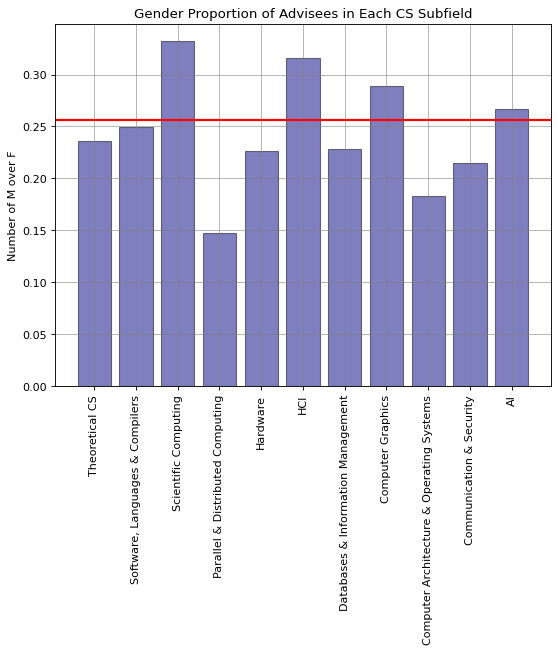

In [ ]:
advisee_subfield = pd.merge(df1, adviser_advisee.iloc[:, 21:], on='Advisor Website')
evens = advisee_subfield.groupby(['Subfields', 'Advisee Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False).index % 2 == 0
odds = advisee_subfield.groupby(['Subfields', 'Advisee Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False).index % 2 == 1

gender_field_proportion = (advisee_subfield.groupby(['Subfields', 'Advisee Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)[evens]['size'].reset_index(drop=True)/advisee_subfield.groupby(['Subfields', 'Advisee Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)[odds]['size'].reset_index(drop=True))
indexes = advisee_subfield.groupby(['Subfields']).nth(0).index[::-1]
advisee_F_M = adviser_advisee['Advisee Gender'].value_counts()['F'] / adviser_advisee['Advisee Gender'].value_counts()['M']
print(advisee_F_M)


plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (indexes)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(gender_field_proportion), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.axhline(y=advisee_F_M,linewidth=2, color='r')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Number of M over F')
plt.title('Gender Proportion of Advisees in Each CS Subfield')

plt.show()

#### For Advisor:

In [ ]:
df1.groupby(['Subfields', 'Advisor Nationality'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)

,Subfields,Advisor Nationality,size
81,Theoretical CS,Usa,10
73,Theoretical CS,India,5
71,Theoretical CS,Canada,4
75,Theoretical CS,Israel,2
72,Theoretical CS,Hungary,1
74,Theoretical CS,Iran,1
76,Theoretical CS,Italy,1
77,Theoretical CS,Poland,1
78,Theoretical CS,Romania,1
79,Theoretical CS,Sweden,1


In [ ]:
df1.groupby(['Subfields', 'Advisor Gender'], as_index=False).size().sort_values(['Subfields', 'size'], ascending=False)

,Subfields,Advisor Gender,size
20,Theoretical CS,M,24
19,Theoretical CS,F,4
18,"Software, Languages & Compilers",M,14
17,"Software, Languages & Compilers",F,2
16,Scientific Computing,M,22
15,Scientific Computing,F,6
14,Parallel & Distributed Computing,M,13
13,Parallel & Distributed Computing,F,1
12,Hardware,M,6
11,HCI,M,3


0.23374083129584353


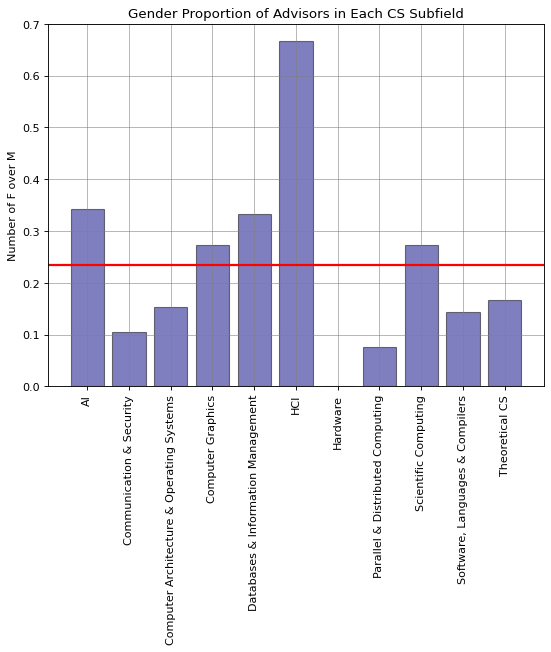

In [ ]:
subfields_gender_number = df1.groupby(['Subfields', 'Advisor Gender']).size()
advisor_gender_proportion = []


indexes = list(subfields_gender_number.index.get_level_values(0).unique())
for field in indexes:
  if subfields_gender_number.index.isin([(field, 'F')]).any():
    advisor_gender_proportion.append(subfields_gender_number[field]['F'] / subfields_gender_number[field]['M'])
  else:
    advisor_gender_proportion.append(0)
advisor_F_M = adviser_advisee['Advisor Gender'].value_counts()['F'] / adviser_advisee['Advisor Gender'].value_counts()['M']
print(advisor_F_M)


plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (indexes)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(advisor_gender_proportion), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.axhline(y=advisor_F_M,linewidth=2, color='r')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Number of F over M')
plt.title('Gender Proportion of Advisors in Each CS Subfield')

plt.show()

# Diversity in each Field

In [ ]:
subfield_nationality_distribution = advisee_subfield.groupby(['Subfields', 'Advisee Nationality']).size() / advisee_subfield.groupby('Subfields').size()
# print(nationality_distribution)
subfields_nationality_distribution = []
for idx, field in enumerate(subfields):
  subfields_nationality_distribution.append(pd.concat([subfield_nationality_distribution[field], advisee_nationality.index.to_series()], axis=1).fillna(0)[0].values)

subfields_nationality_distribution = np.asarray(subfields_nationality_distribution, dtype=np.float32)

In [ ]:
from scipy.stats import entropy

subfield_entropy = pd.Series(np.apply_along_axis(entropy, 1, subfields_nationality_distribution), index = subfields) 

subfield_entropy.sort_values(ascending=False)

Theoretical CS                               2.853643
Scientific Computing                         2.845720
Software, Languages & Compilers              2.784598
AI                                           2.737622
Computer Graphics                            2.535714
Communication & Security                     2.520477
HCI                                          2.492537
Parallel & Distributed Computing             2.441692
Computer Architecture & Operating Systems    2.414855
Hardware                                     2.178648
Databases & Information Management           1.984186
dtype: float32

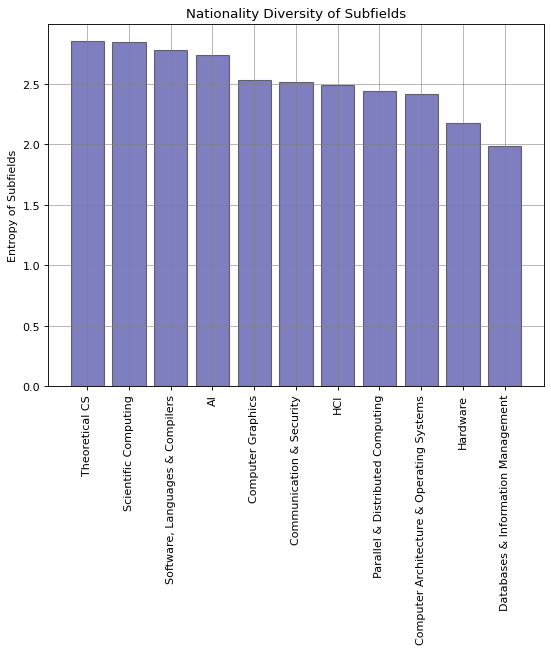

In [ ]:
fields_diversity = subfield_entropy.sort_values(ascending=False)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='black')
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
objects = (fields_diversity.index)
y_pos = np.arange(len(objects))

plt.bar(y_pos, list(fields_diversity), align='center', alpha=0.5, edgecolor='black', color='navy')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Entropy of Subfields')
plt.title('Nationality Diversity of Subfields')

plt.show()

# Performance of Minority Professors

In [ ]:
female_profs = result[result['Advisor Gender'] == 'F']
print(female_profs['Advisor Citation'].describe(), '\n')

count        23.000000
mean      22795.695652
std       36378.709969
min        1591.000000
25%        3574.000000
50%        7184.000000
75%       22554.000000
max      129279.000000
Name: Advisor Citation, dtype: float64 



In [ ]:
male_profs = result[result['Advisor Gender'] == 'M']
print(male_profs['Advisor Citation'].describe(), '\n')

count        94.000000
mean      20752.510638
std       28344.715080
min         396.000000
25%        3108.500000
50%       11798.500000
75%       26760.250000
max      178786.000000
Name: Advisor Citation, dtype: float64 



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


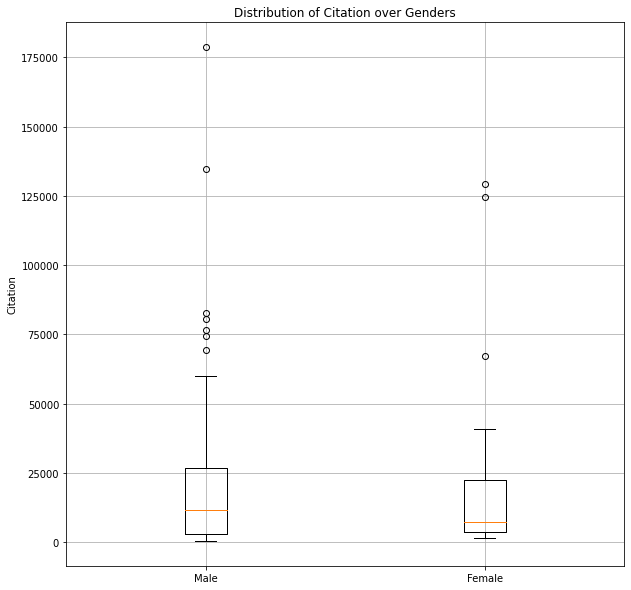

In [ ]:
data_to_plot = [male_profs['Advisor Citation'], female_profs['Advisor Citation']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Male', 'Female'])
plt.grid()

plt.ylabel('Citation')
plt.title('Distribution of Citation over Genders');

In [ ]:
female_profs = result[result['Advisor Gender'] == 'F']
print(female_profs['Advisor h-index'].describe(), '\n')

count     23.000000
mean      48.000000
std       33.286634
min       14.000000
25%       22.000000
50%       40.000000
75%       59.500000
max      131.000000
Name: Advisor h-index, dtype: float64 



In [ ]:
female_profs = result[result['Advisor Gender'] == 'M']
print(female_profs['Advisor h-index'].describe(), '\n')

count     94.000000
mean      50.382979
std       30.224289
min       10.000000
25%       26.000000
50%       44.500000
75%       66.000000
max      171.000000
Name: Advisor h-index, dtype: float64 



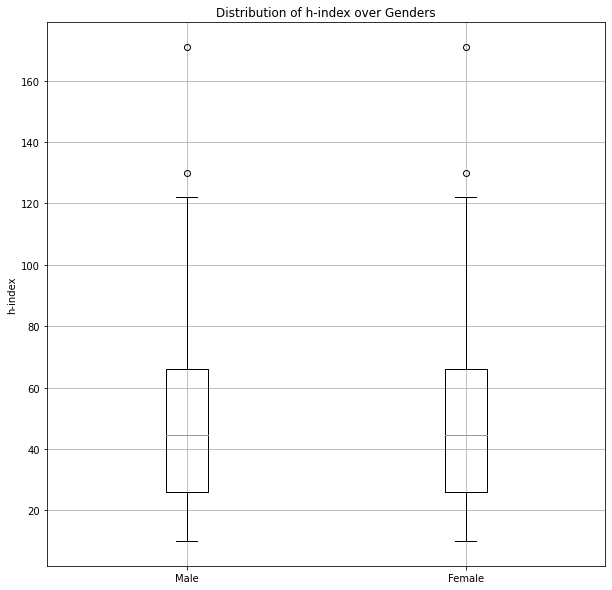

In [ ]:
data_to_plot = [male_profs['Advisor h-index'], female_profs['Advisor h-index']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Male', 'Female'])
plt.grid()

plt.ylabel('h-index')
plt.title('Distribution of h-index over Genders');

In [ ]:
female_profs = result[result['Advisor Gender'] == 'F']
print(female_profs['Advisor Publication Number'].describe(), '\n')

count     23.000000
mean     205.695652
std      175.718896
min       17.000000
25%       95.500000
50%      134.000000
75%      260.000000
max      787.000000
Name: Advisor Publication Number, dtype: float64 



In [ ]:
female_profs = result[result['Advisor Gender'] == 'M']
print(female_profs['Advisor Publication Number'].describe(), '\n')

count     94.000000
mean     212.702128
std      172.910993
min       11.000000
25%       73.000000
50%      156.500000
75%      307.750000
max      757.000000
Name: Advisor Publication Number, dtype: float64 



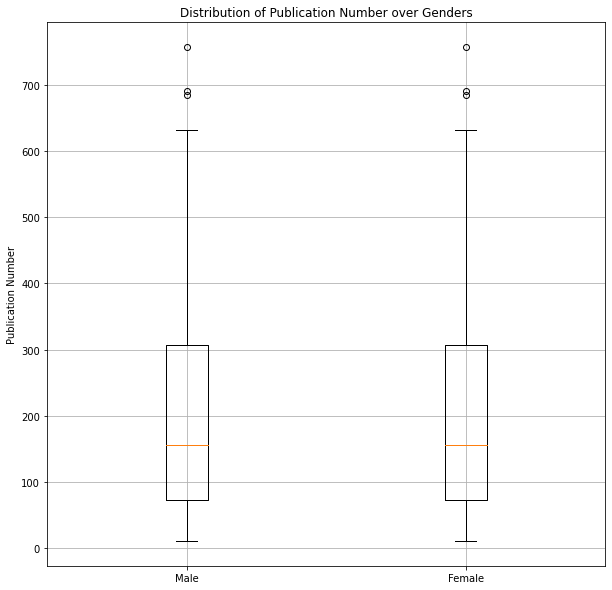

In [ ]:
data_to_plot = [male_profs['Advisor Publication Number'], female_profs['Advisor Publication Number']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Male', 'Female'])
plt.grid()

plt.ylabel('Publication Number')
plt.title('Distribution of Publication Number over Genders');

In [ ]:
minority_nationalities = advisor_nationality[7:]
majority_nationalities = advisor_nationality[:6]
minority_profs = result[result['Advisor Nationality'].isin(minority_nationalities.index)]
majority_profs = result[result['Advisor Nationality'].isin(majority_nationalities.index)]
print('Majority Nationalities:\n', majority_nationalities)
print('Minority Nationalities:\n', minority_nationalities)

Majority Nationalities:
 Usa       0.408333
India     0.133333
Canada    0.091667
China     0.066667
Israel    0.050000
Iran      0.033333
Name: Advisor Nationality, dtype: float64
Minority Nationalities:
 France         0.016667
Italy          0.016667
Portugal       0.016667
Russia         0.016667
Uk             0.016667
Poland         0.008333
Japan          0.008333
Turkey         0.008333
Brazil         0.008333
Netherlands    0.008333
Syria          0.008333
Finland        0.008333
Spain          0.008333
Jordan         0.008333
Romania        0.008333
Korea          0.008333
Sweden         0.008333
Hungary        0.008333
Name: Advisor Nationality, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


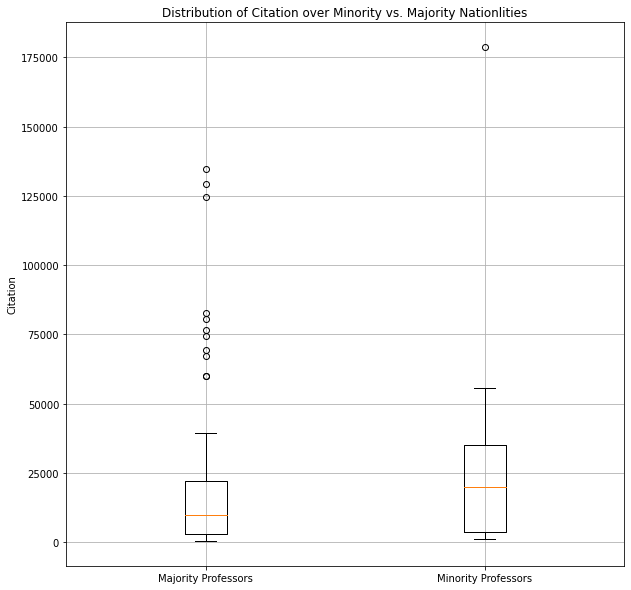

In [ ]:
data_to_plot = [majority_profs['Advisor Citation'], minority_profs['Advisor Citation']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Majority Professors', 'Minority Professors'])
plt.grid()

plt.ylabel('Citation')
plt.title('Distribution of Citation over Minority vs. Majority Nationlities');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


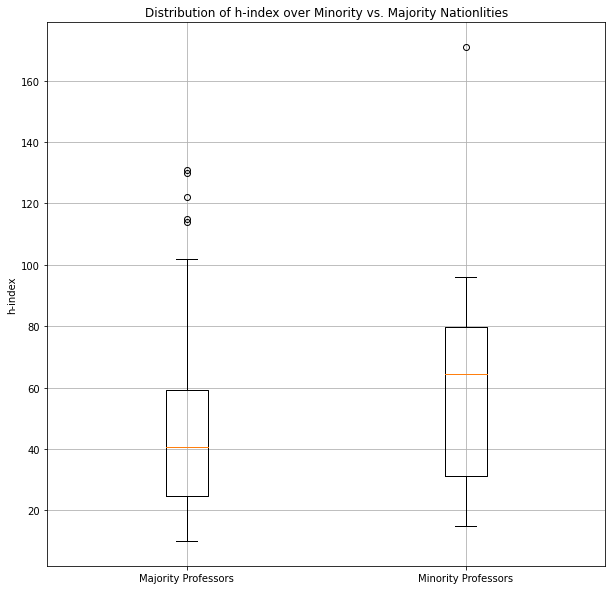

In [ ]:
data_to_plot = [majority_profs['Advisor h-index'], minority_profs['Advisor h-index']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Majority Professors', 'Minority Professors'])
plt.grid()

plt.ylabel('h-index')
plt.title('Distribution of h-index over Minority vs. Majority Nationlities');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


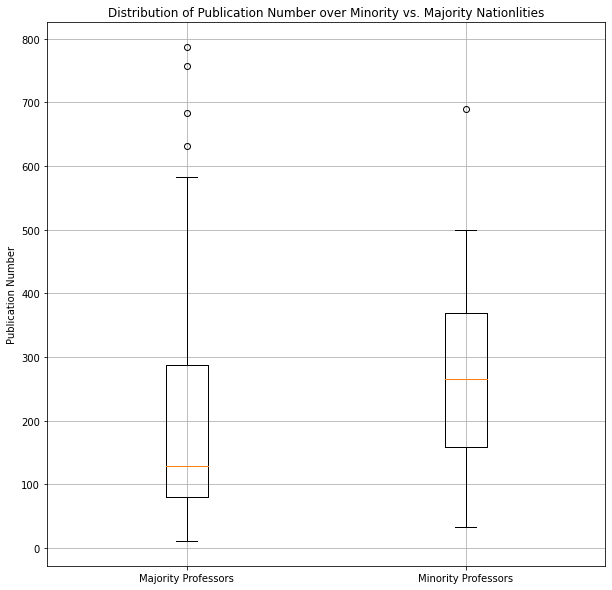

In [ ]:
data_to_plot = [majority_profs['Advisor Publication Number'], minority_profs['Advisor Publication Number']]
plt.figure(figsize=(10, 10))
box = plt.boxplot(data_to_plot, labels=['Majority Professors', 'Minority Professors'])
plt.grid()

plt.ylabel('Publication Number')
plt.title('Distribution of Publication Number over Minority vs. Majority Nationlities');

#Which Pairs of Nationality are the Most Repititive?

In [ ]:
advisor_advisee_nationalities = adviser_advisee[['Advisor Nationality', 'Advisee Nationality']]
advisor_advisee_nationalities[['Advisor Nationality', 'Advisee Nationality']] = np.sort(advisor_advisee_nationalities[['Advisor Nationality', 'Advisee Nationality']], axis=1)

advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

Advisor Nationality  Advisee Nationality
Usa                  Usa                    311
India                Usa                    219
China                Usa                    201
                     China                   76
Canada               China                   73
India                India                   66
Israel               Usa                     66
Germany              Usa                     56
China                India                   56
Canada               Canada                  54
                     Usa                     51
France               Usa                     45
Korea                Usa                     44
Iran                 Usa                     33
Portugal             Usa                     31
China                Italy                   26
Italy                Usa                     26
India                Korea                   24
                     Israel                  23
                     Iran                    21

# Graph Visualization of Data

### Countries' Collaboration

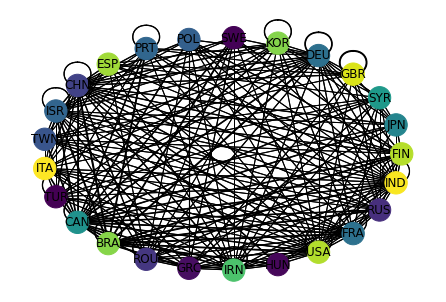

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

country1, country2 = zip(*(list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().index)))
country1 = alpha3code(list(country1))
country2 = alpha3code(list(country2))
weights = list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().sort_values(ascending=False).values)
edges = list(zip(country1, country2, weights))

G = nx.Graph()
G.add_nodes_from(list(set(country1+country2)))
G.add_weighted_edges_from(edges)

remove = [node for node,degree in dict(G.degree()).items() if degree < 10]
G.remove_nodes_from(remove)

pos = nx.circular_layout(G, scale=3)
d = dict(G.degree)
all_edges = G.edges()
weights = [G[u][v]['weight'] for u,v in all_edges]
nx.draw(G, pos, with_labels=True, nodelist=d.keys(), node_size=500, node_color=np.random.randint(G.number_of_nodes()*10, size=G.number_of_nodes()))
nx.draw_networkx_edges(G, pos, width=np.sqrt(np.sqrt(weights)))

plt.show()

In [ ]:
# !sudo apt-get install libgeos-3.5.0
# !sudo apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

# from mpl_toolkits.basemap import Basemap as Basemap
# country1, country2 = zip(*(list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().index)))
# country1 = alpha3code(list(country1))
# country2 = alpha3code(list(country2))
# weights = list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().sort_values(ascending=False).values)
# edges = list(zip(country1, country2, weights))

# G = nx.Graph()
# G.add_nodes_from(list(set(country1+country2)))
# G.add_weighted_edges_from(edges)

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

# plt.figure(figsize = (10,9))
# m = Basemap(
#          projection='merc',
#          llcrnrlon=-180,
#          llcrnrlat=10,
#          urcrnrlon=-50,
#          urcrnrlat=70,
#          lat_ts=0,
#          resolution='l',
#          suppress_ticks=True)

# pos = {}

# world = pd.merge(world, location, on='name', how='left')

# world.loc[21, 'CODE'] = 'NOR'
# world.loc[43, 'CODE'] = 'FRA'
# world.loc[160, 'CODE'] = 'CYP'

# for count, node in enumerate (G.nodes()):
#   if not world['CODE'][world['CODE'].isin([node])].empty:
#     pos[node] = (world[world['CODE'] == node]['longitude'].iloc[0], world[world['CODE'] == node]['latitude'].iloc[0])
#   else:
#     print(node)

# pos['SGP'] = (103.8198, 1.3521)
# pos['MLT'] = (14.3754, 35.9375)

# nx.draw_networkx_nodes(G = G, pos = pos, node_color = 'r', alpha = 0.8,
#                        node_size = 100)

# g_edges = G.edges()
# g_weights = [G[u][v]['weight'] for u,v in g_edges]

# nx.draw_networkx_edges(G = G, pos = pos, edge_color='g',
#                         alpha=0.2, arrows = False, width=2.5*np.sqrt(np.sqrt(g_weights)))
 
# m.drawcountries(linewidth = 3)
# m.drawstates(linewidth = 0.2)
# m.drawcoastlines(linewidth=3)
# plt.tight_layout()
# # plt.savefig("./images/map_1.png", format = "png", dpi = 300)
# plt.show()

 

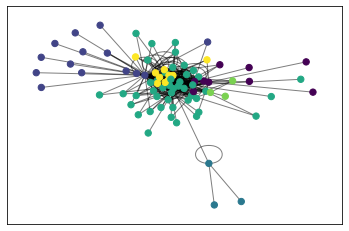

[['ARG', 'IRQ', 'TUN', 'ETH', 'COL', 'CHN', 'ITA', 'CMR', 'NGA'], ['GHA', 'UGA', 'DOM', 'MNG', 'MLT', 'PAN', 'DZA', 'MAR', 'NAM', 'GEO', 'USA', 'AUT', 'URY', 'IRL'], ['JOR', 'YEM', 'PSE'], ['LKA', 'FIN', 'HRV', 'LBN', 'SVN', 'JPN', 'UKR', 'SYR', 'CHE', 'MEX', 'NZL', 'CZE', 'BEL', 'SGP', 'MYS', 'LVA', 'PER', 'GUY', 'BGD', 'POL', 'NLD', 'ESP', 'EGY', 'ISR', 'PAK', 'SVK', 'TWN', 'PHL', 'CAN', 'BGR', 'BRA', 'ROU', 'GRC', 'ISL', 'SRB', 'SAU', 'VEN', 'NPL', 'FRA', 'RUS', 'IDN', 'CHL', 'THA', 'IND', 'MOZ'], ['ARM', 'VNM', 'HUN'], ['GBR', 'DEU', 'KOR', 'SWE', 'PRT', 'AUS', 'TUR', 'IRN', 'ECU', 'DNK']]
['Argentina', 'Iraq', 'Tunisia', 'Ethiopia', 'Colombia', 'China', 'Italy', 'Cameroon', 'Nigeria']
['Ghana', 'Uganda', 'Dominican Republic', 'Mongolia', 'Malta', 'Panama', 'Algeria', 'Morocco', 'Namibia', 'Georgia', 'United States', 'Austria', 'Uruguay', 'Ireland']
['Jordan', 'Yemen', 'Palestine']
['Sri Lanka', 'Finland', 'Croatia', 'Lebanon', 'Slovenia', 'Japan', 'Ukraine', 'Syria', 'Switzerland'

In [ ]:
!pip install python-louvain
from community import community_louvain as community_louvain


import matplotlib.cm as cm

!pip install country_converter
import country_converter as coco


country1, country2 = zip(*(list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().index)))
country1 = alpha3code(list(country1))
country2 = alpha3code(list(country2))
weights = list(advisor_advisee_nationalities.groupby(['Advisor Nationality', 'Advisee Nationality']).size().sort_values(ascending=False).values)
edges = list(zip(country1, country2, weights))

G = nx.Graph()
G.add_nodes_from(list(set(country1+country2)))
G.add_weighted_edges_from(edges)

# s = 0
# for country in G.degree(weight='weight'):
#   print(country)
#   s += country[1]
# s

#first compute the best partition
partition = community_louvain.best_partition(G)

# compute the best partition
# partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


communities = []

for cnum in set(partition.values()):
  communities.append([])
  for i in partition.keys():
    if partition[i] == cnum:
      communities[cnum].append(i)

print(communities)
for cnum in set(partition.values()):
  print(coco.convert(names = communities[cnum], to = 'name_short'))



### Fields' Collaboration

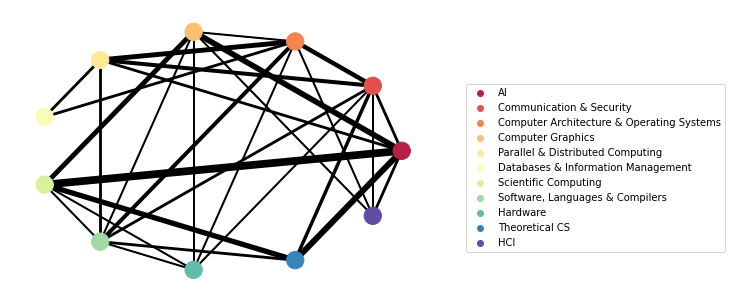

In [ ]:
from networkx.algorithms import bipartite

B = nx.Graph()

B.add_nodes_from(subfields, bipartite=0)
B.add_nodes_from(result['Advisor Website'], bipartite=1)

B.add_edges_from(list(zip(df1['Advisor Website'], df1['Subfields'])))

G_projected = bipartite.weighted_projected_graph(B, subfields)




Colour_map = {'AI': 1, 'Communication & Security': 3, 'Computer Architecture & Operating Systems': 5, 'Computer Graphics': 7, 'Parallel & Distributed Computing': 9, 'Databases & Information Management': 11, 'Scientific Computing': 13, 'Software, Languages & Compilers': 15, 'Hardware': 17, 'Theoretical CS': 19, 'HCI': 21}
values = [5*Colour_map.get(node) for node in G_projected.nodes()]
# compute maximum value s.t. all colors can be normalised
maxval = np.max(values) 

# get colormap
cmap=plt.cm.Spectral

pos = nx.circular_layout(G_projected, scale=3)
# pos = nx.spring_layout(G_projected)
d = dict(G_projected.degree)

nx.draw(G_projected, pos, with_labels=False, nodelist=d.keys(), node_color = [cmap(v/maxval) for v in values])

G_projected_edges = G_projected.edges.data("weight", default=1)
G_projected_weights = [edge[2] for edge in G_projected_edges]
nx.draw_networkx_edges(G_projected, pos, width=2*np.sqrt(G_projected_weights))

# make empty plot with correct color and label for each group
for idx, v in enumerate(values):
    plt.scatter([],[], c=[cmap(v/maxval)], label=subfields[idx])

plt.legend(bbox_to_anchor=(1.05, 0.75))
plt.show()

In [ ]:
!pip3 install beautifulsoup

import requests

from bs4 import BeautifulSoup

# page = requests.get("https://csd.cmu.edu/directory/faculty")
# soup = BeautifulSoup(page.content, 'html.parser')
# print('CMU between 1 to', len(soup.find_all(class_='even')) + len(soup.find_all(class_='odd')))

# n = 5
# if (n % 2) == 0:
#   print(soup.find_all(class_='even')[int(n/2) - 1])
# else:
#     print(soup.find_all(class_='odd')[int((n-1)/2)])

# print(soup.find_all(class_='person-listing')[60].prettify()) 


# page = requests.get("https://cs.stanford.edu/directory/faculty")
# soup = BeautifulSoup(page.content, 'html.parser')
# table = soup.find(lambda tag: tag.name=='table') 
# rows = table.findAll(lambda tag: tag.name=='tr')
# # len(rows)
# rows[36]



ERROR: Could not find a version that satisfies the requirement beautifulsoup (from versions: 3.2.0, 3.2.1, 3.2.2)
ERROR: No matching distribution found for beautifulsoup
